In [200]:
import albumentations as A

import torch

from torchvision import models
from torchvision import transforms as T

from pathlib import Path

from PIL import Image

import matplotlib.pyplot as plt

In [201]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [202]:
model = torch.load('/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/models_v2/Unet.pt')

In [203]:
model.to(device)

Unet(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

In [204]:
model.eval()

Unet(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

In [205]:
def transform_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    img_transforms = A.Compose([A.Resize(768, 1152, interpolation=cv2.INTER_NEAREST)])
    aug = img_transforms(image = img)
    img = Image.fromarray(aug['image'])

    ori = img

    t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
    
    img = t(img)
    img = img.to(device)

    return [img.unsqueeze(0), ori]

In [206]:
def predict_image(img):
    with torch.no_grad():
        output = model(img)
        masked = torch.argmax(output, dim=1)
        masked = masked.cpu().squeeze(0)

    return masked

In [207]:
TEST_PATH = "/home/enfycius/Desktop/filter/"

In [208]:
import numpy as np
import cv2

import os

In [209]:
def get_files(path) -> list[list[str]]:
    files = []
    files_path = []

    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            files.append(filename)
            files_path.append(dirname + filename)

    return [files, files_path]

In [210]:
def path_to_img(paths, flag=cv2.IMREAD_COLOR):
    imgs = []

    _, paths = get_files(paths)

    for path in paths:
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        imgs.append(img)
        
    return [imgs, paths]

In [211]:
imgs, paths = path_to_img(TEST_PATH)

In [212]:
SAVE_PATH = "/home/enfycius/Desktop/prediction/"

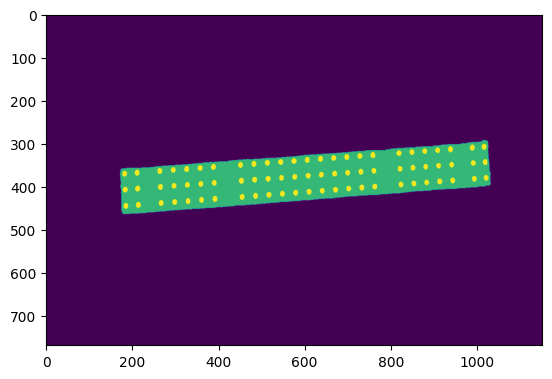

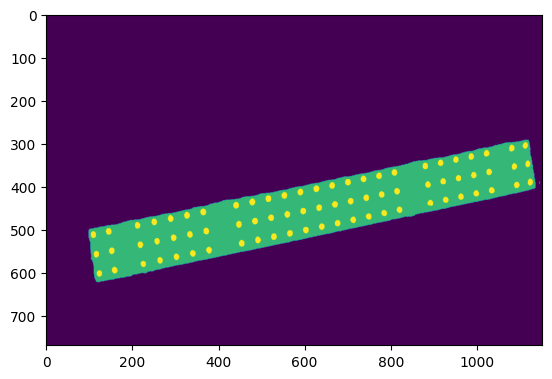

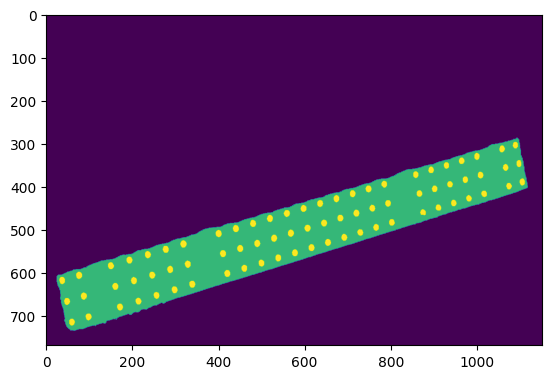

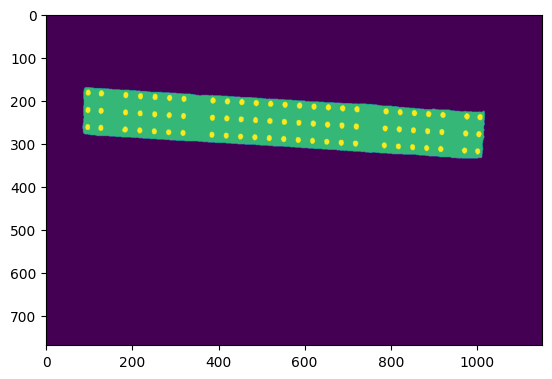

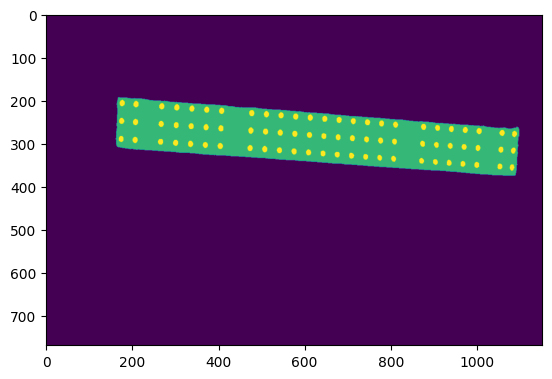

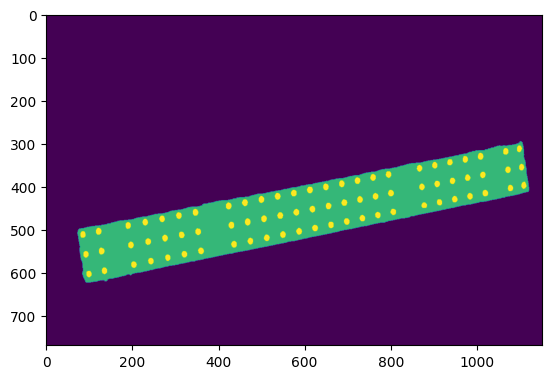

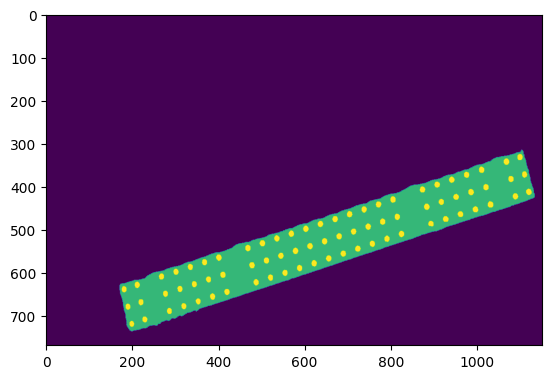

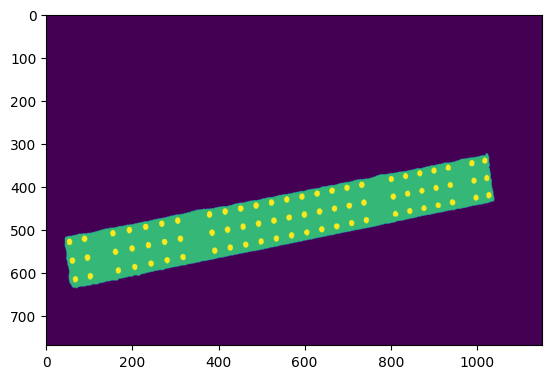

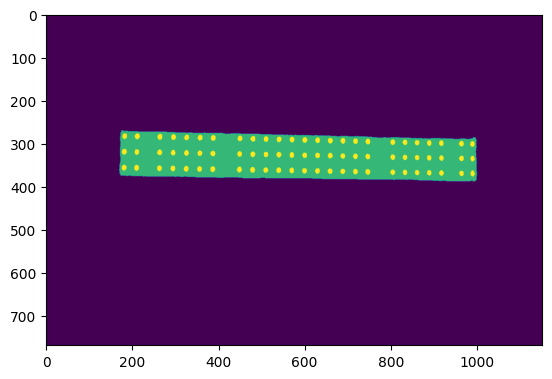

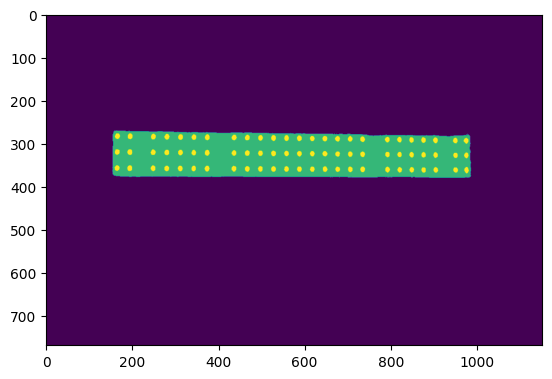

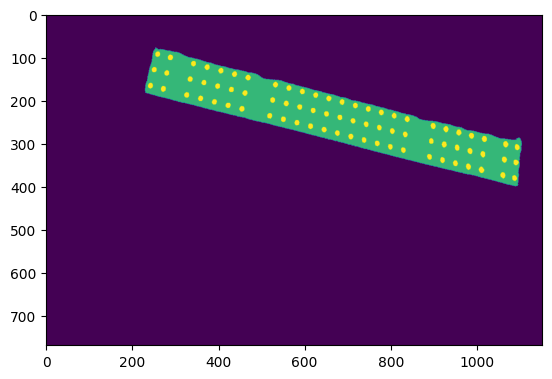

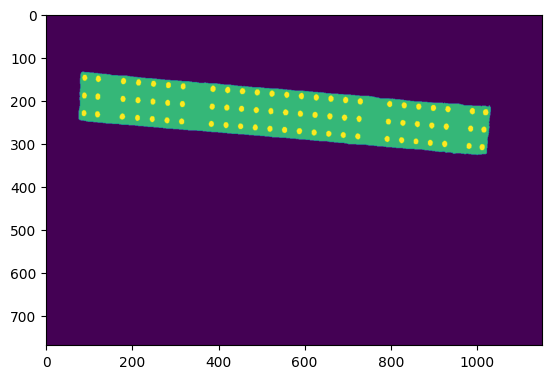

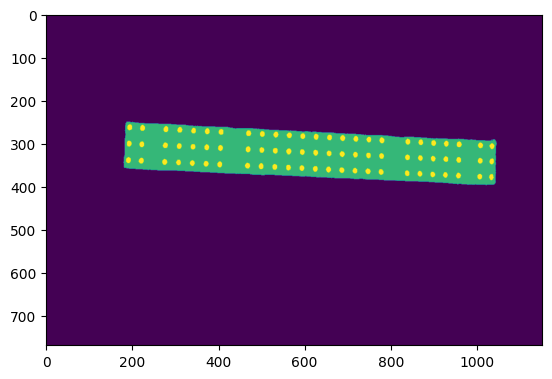

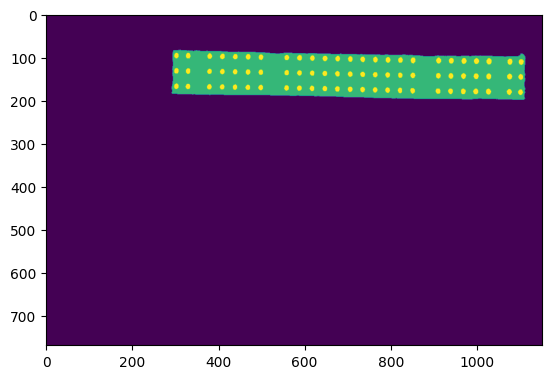

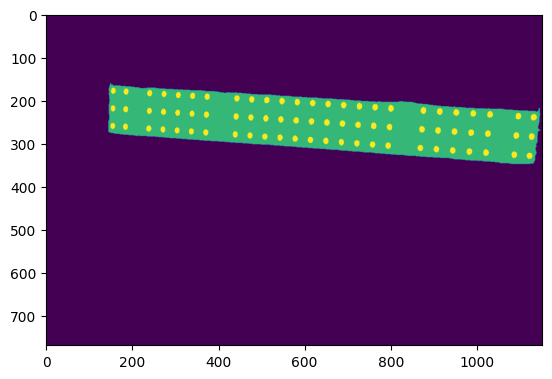

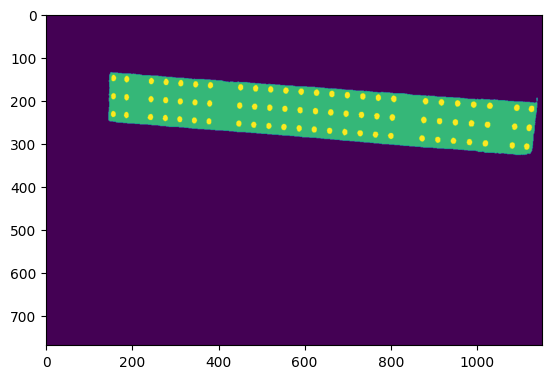

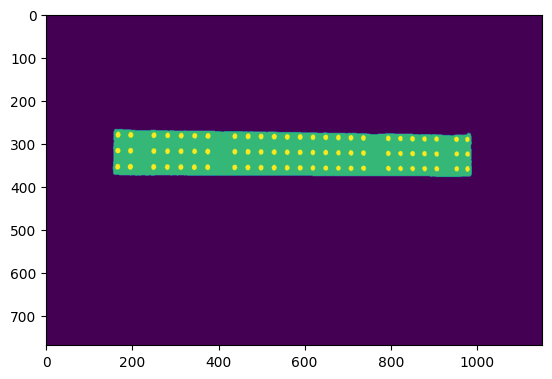

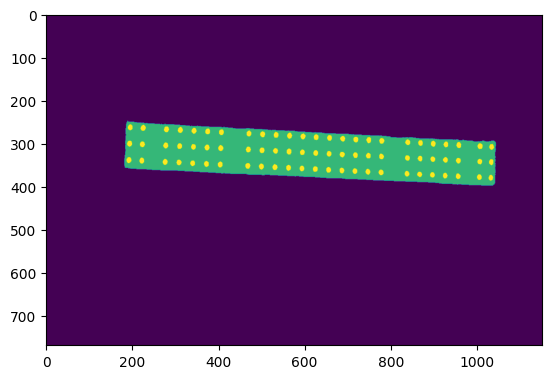

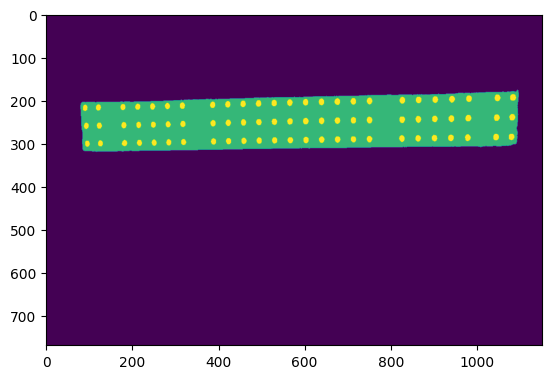

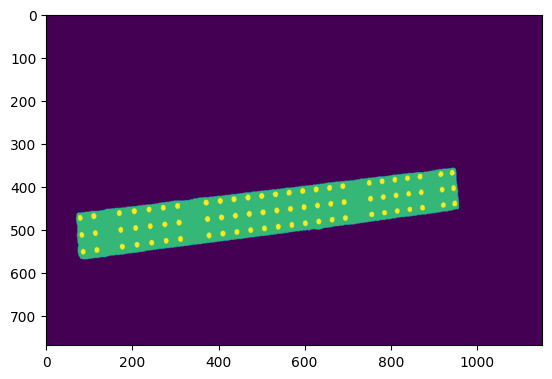

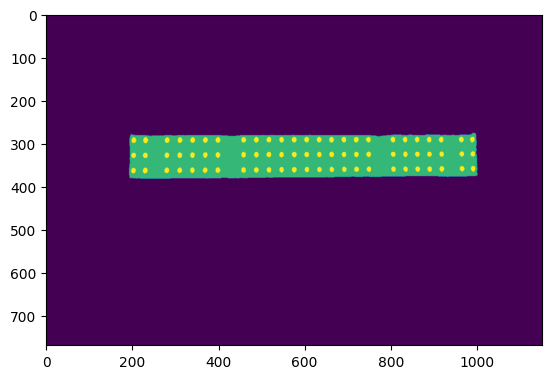

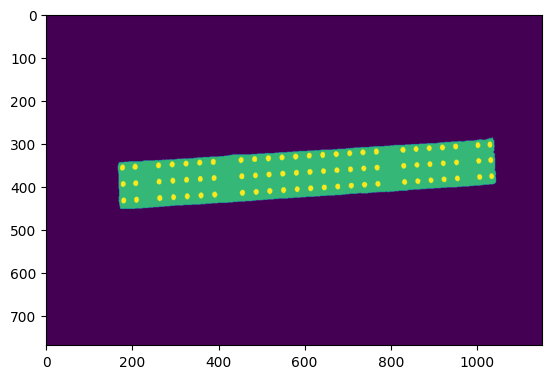

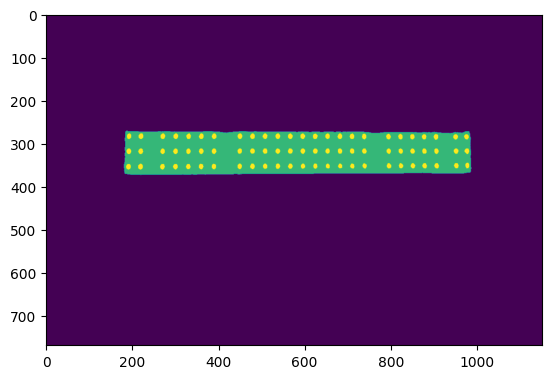

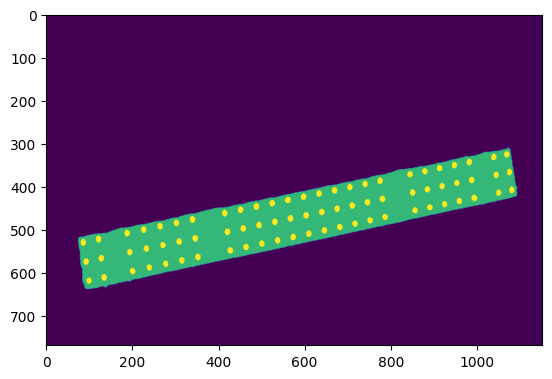

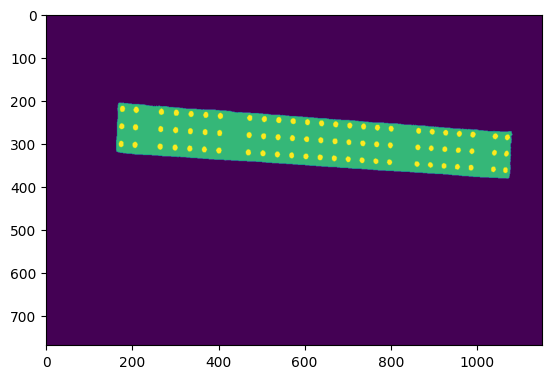

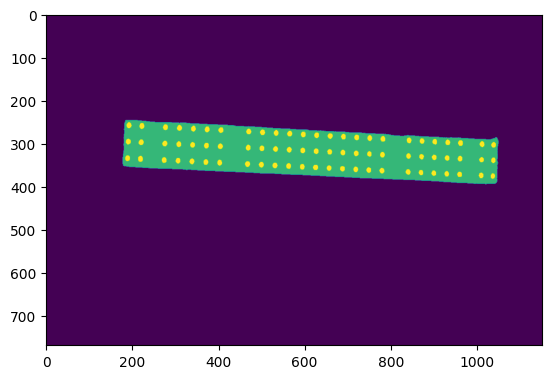

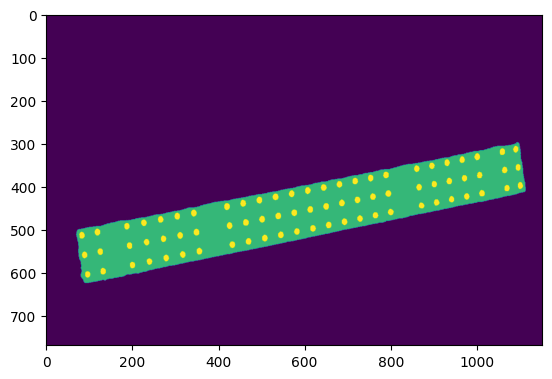

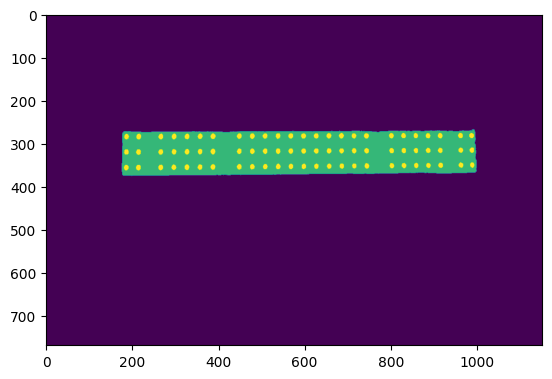

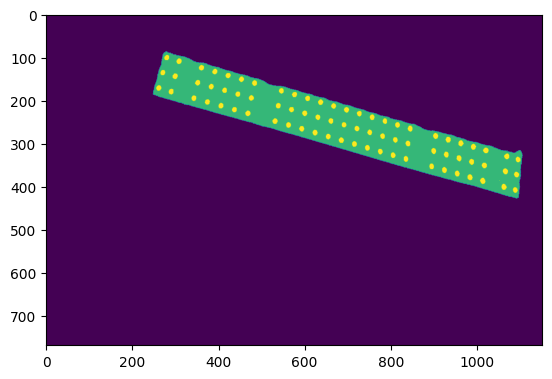

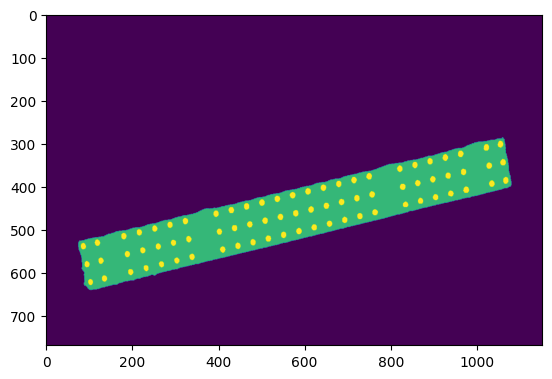

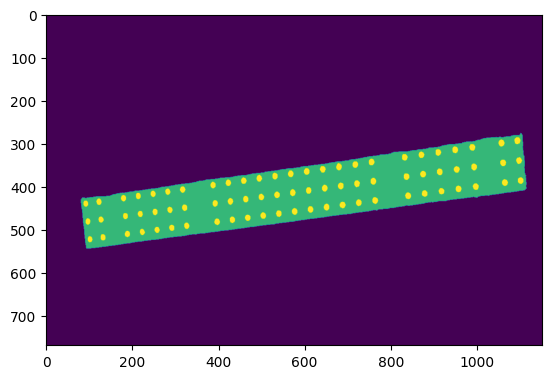

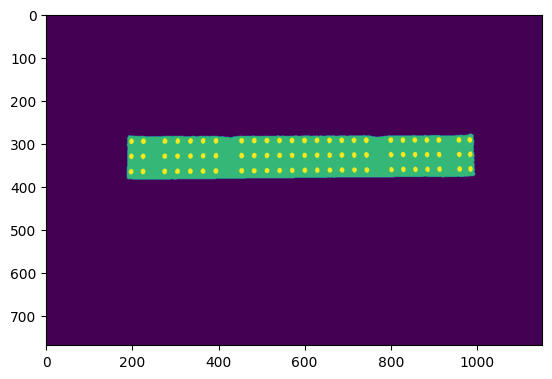

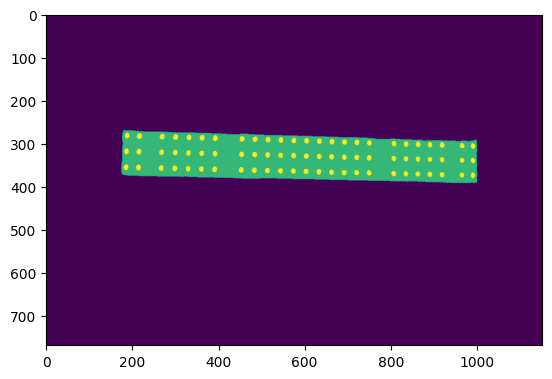

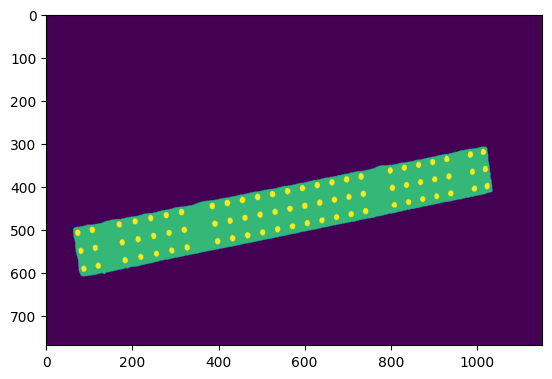

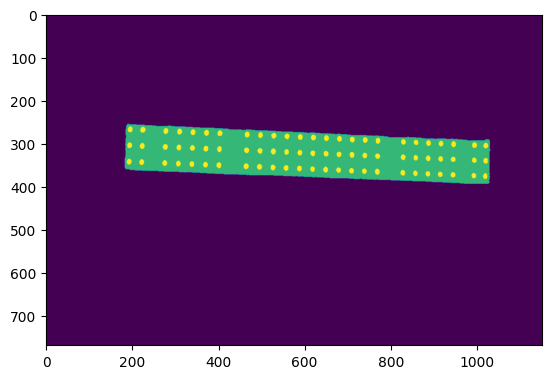

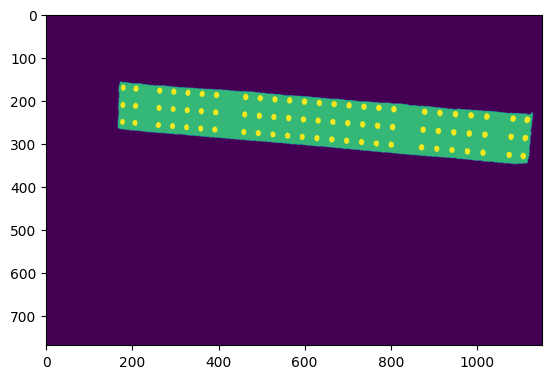

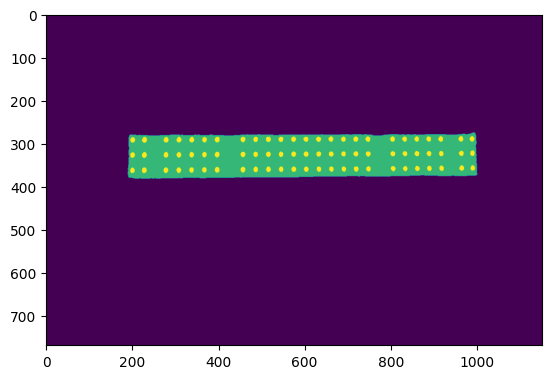

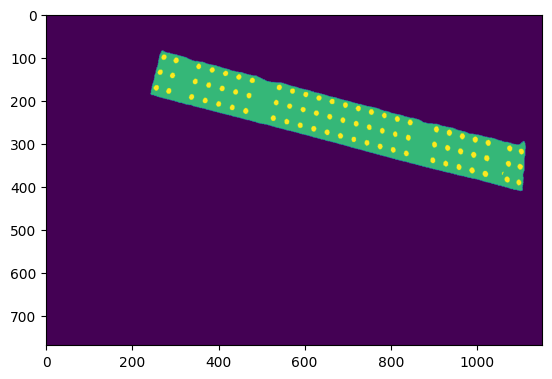

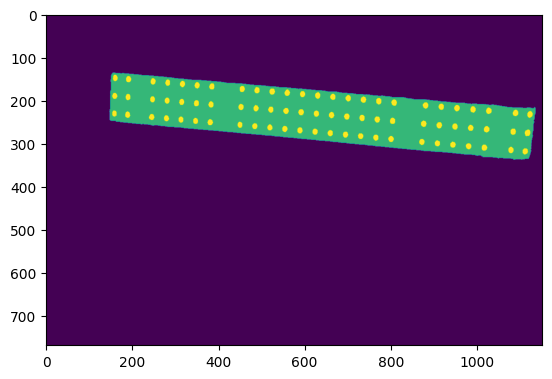

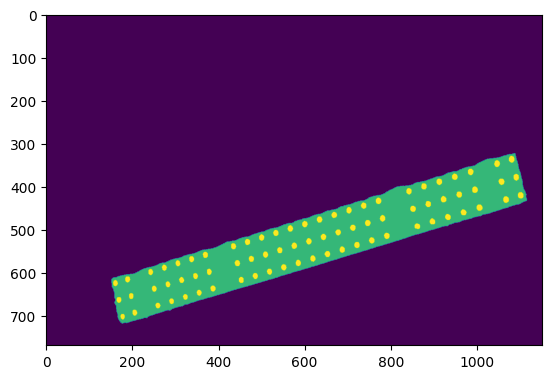

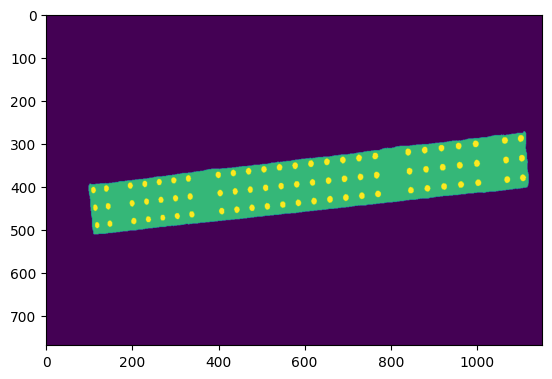

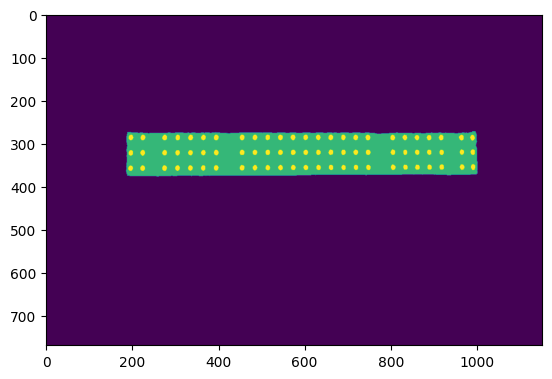

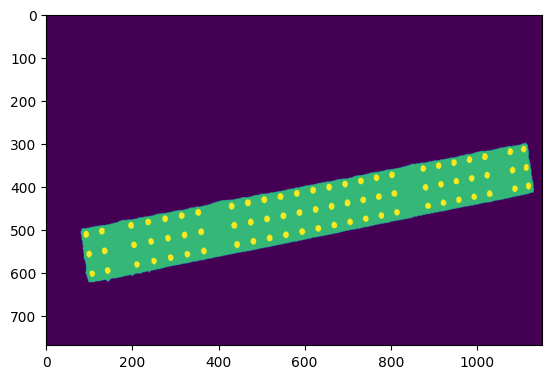

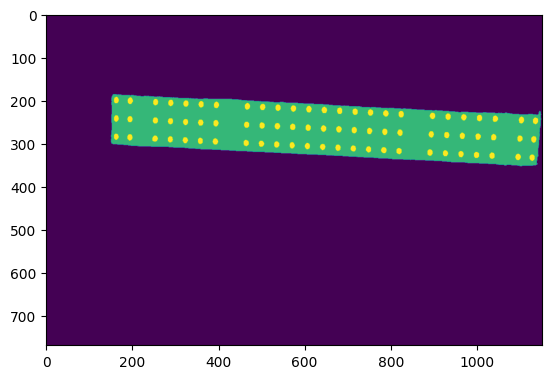

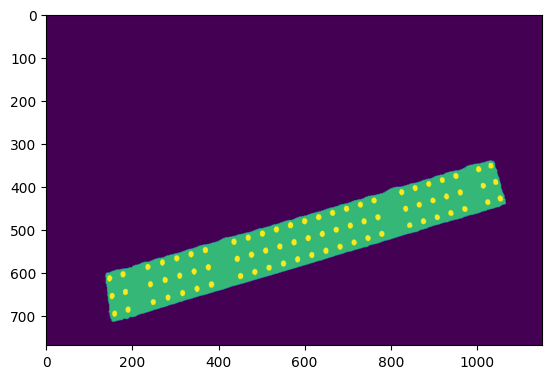

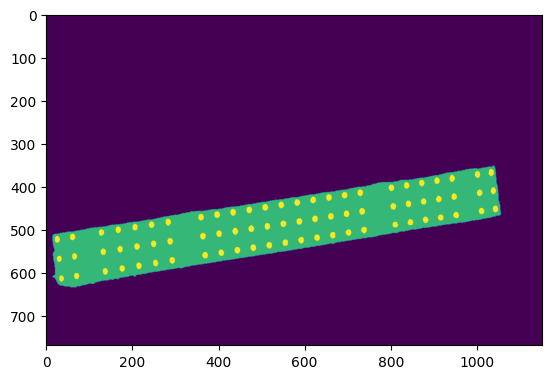

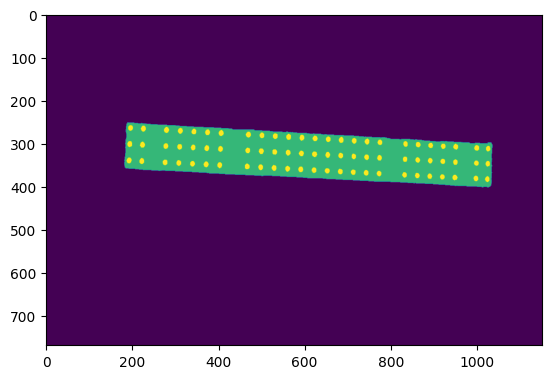

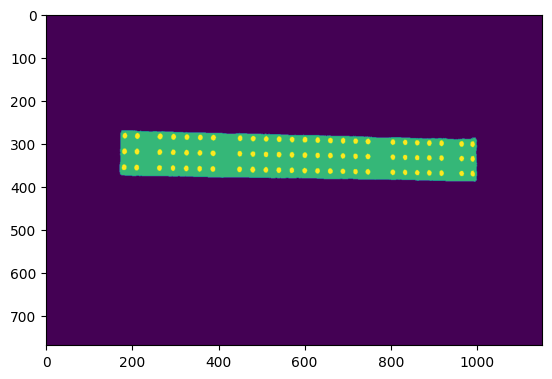

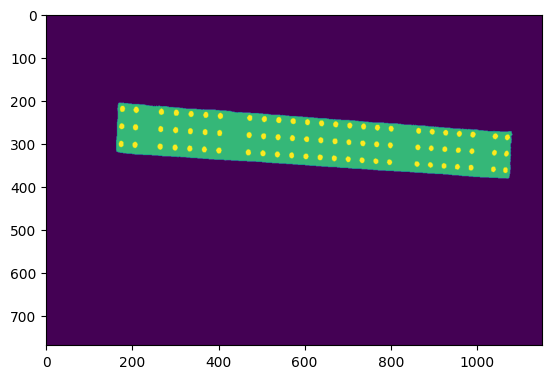

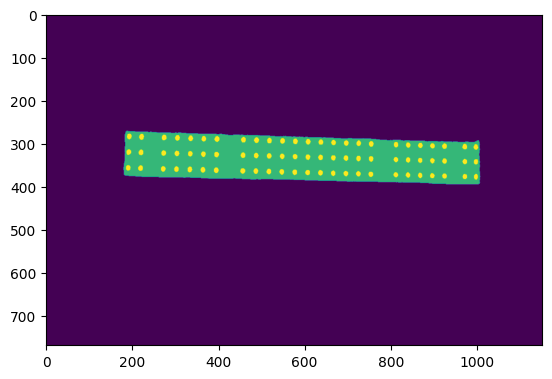

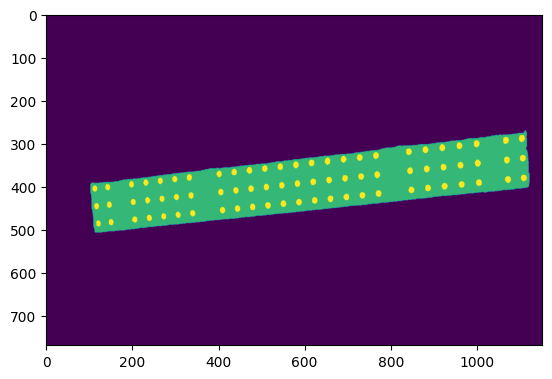

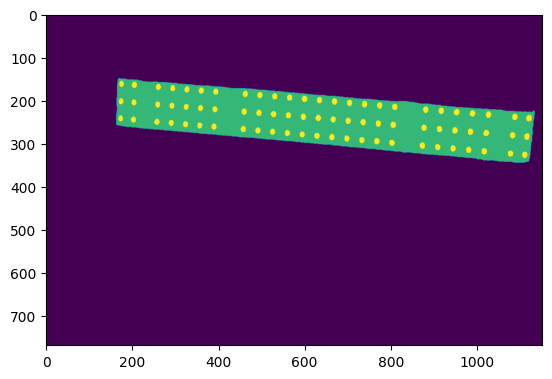

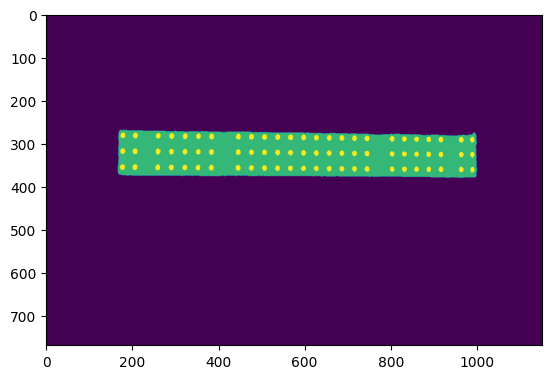

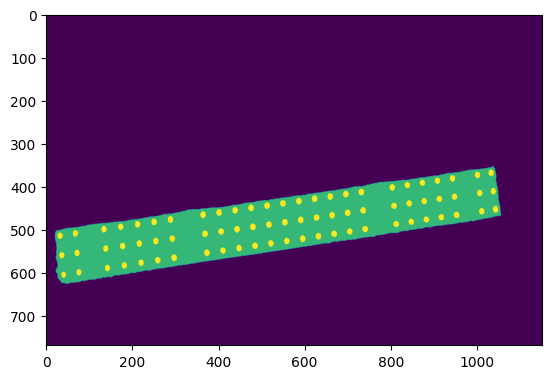

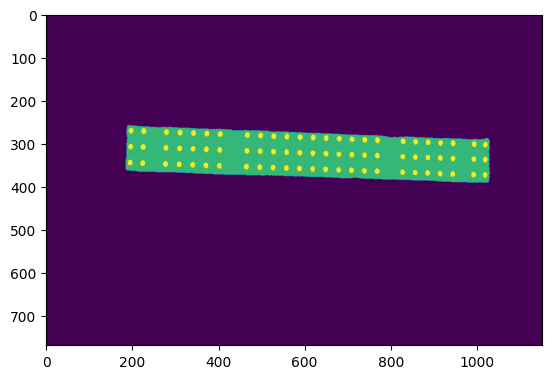

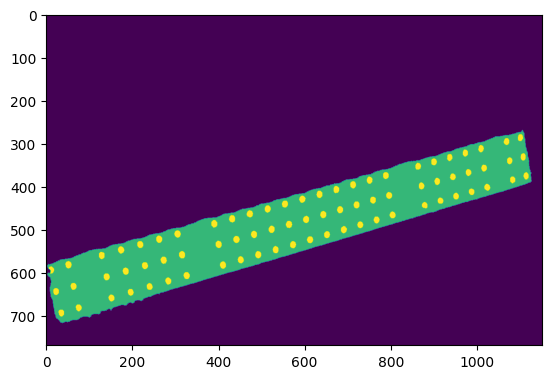

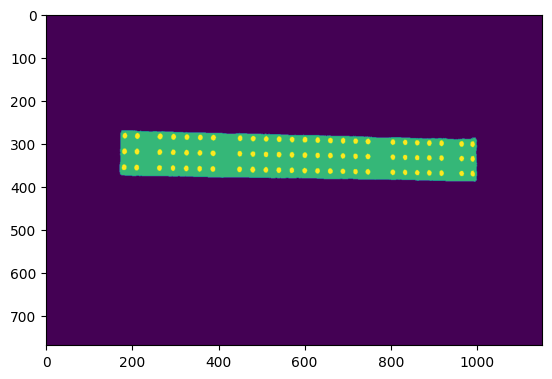

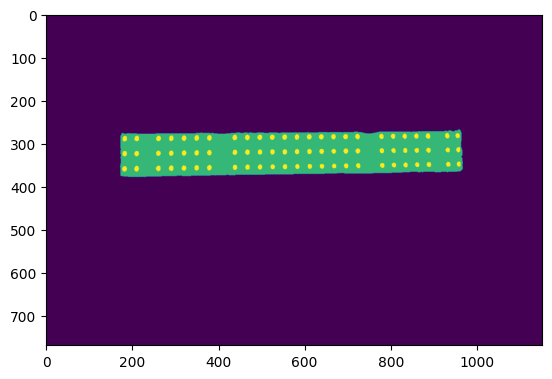

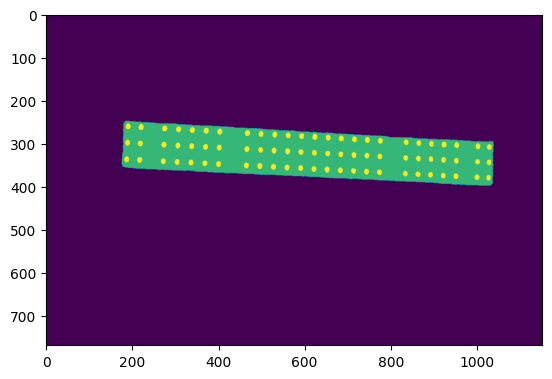

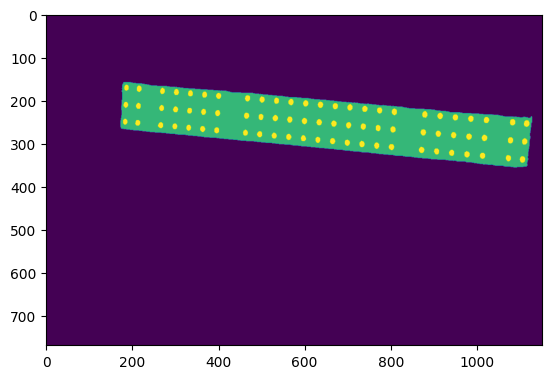

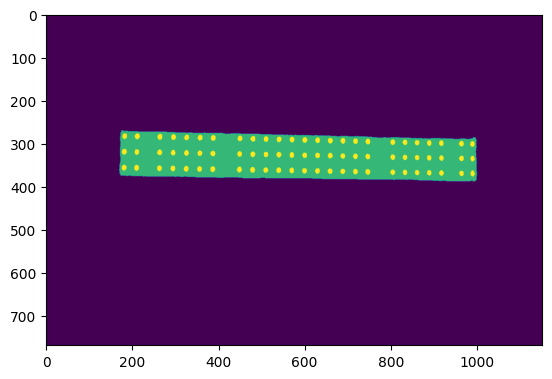

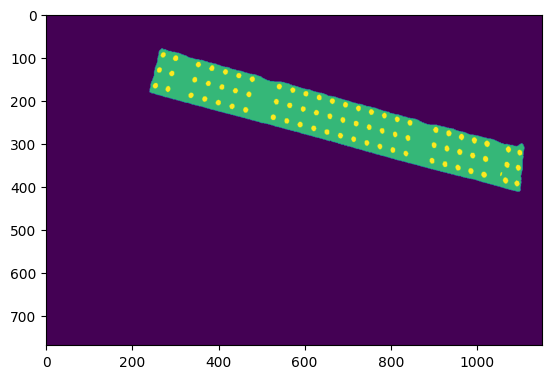

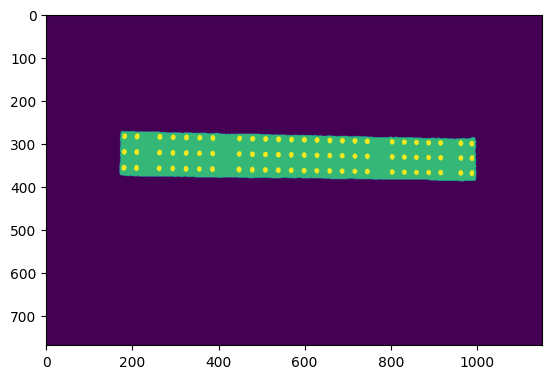

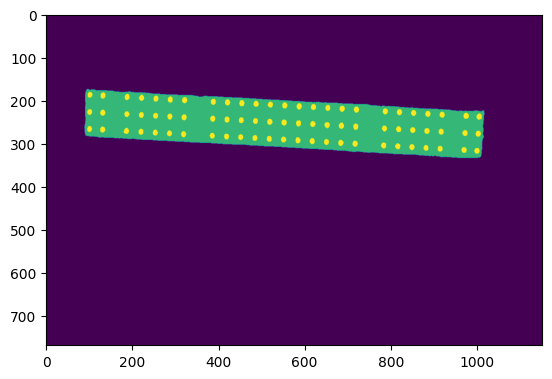

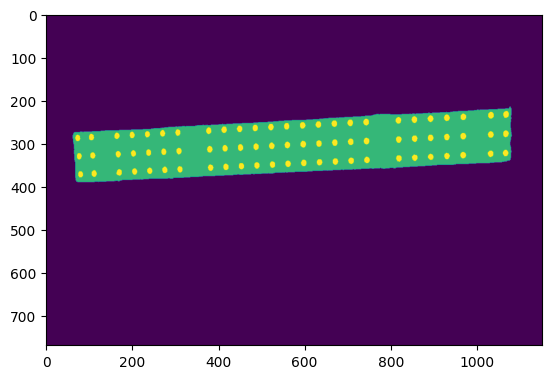

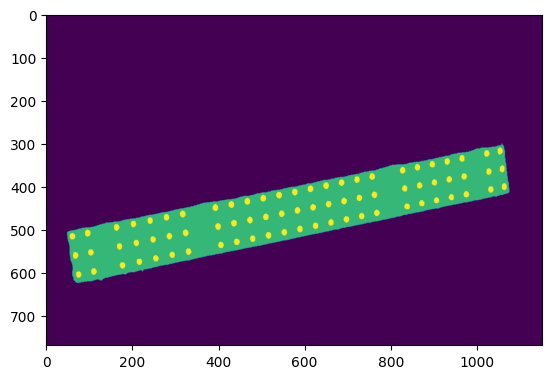

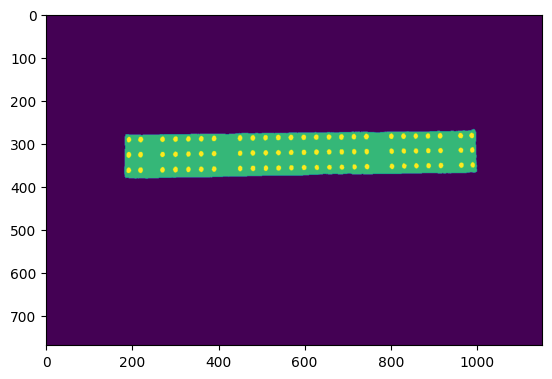

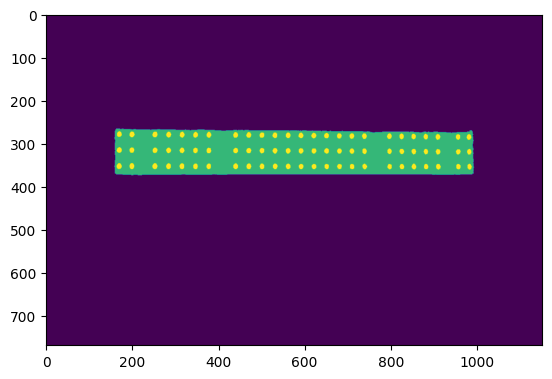

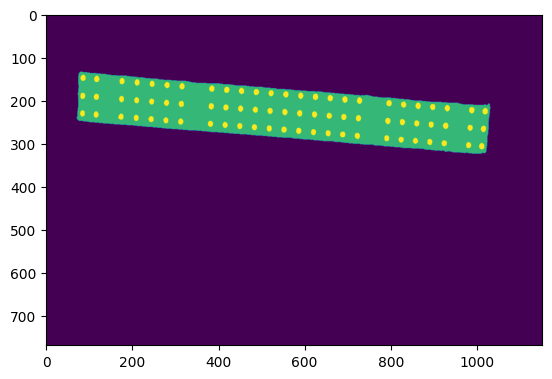

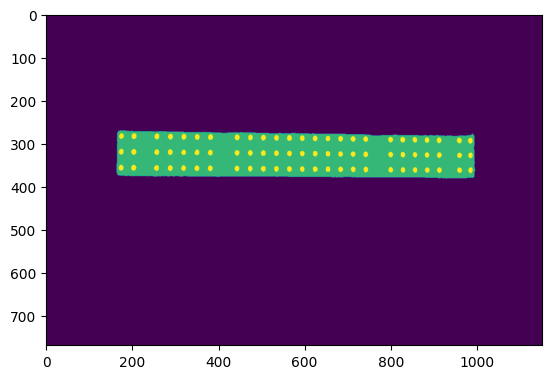

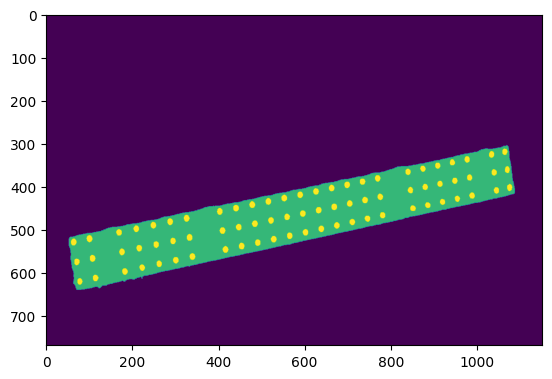

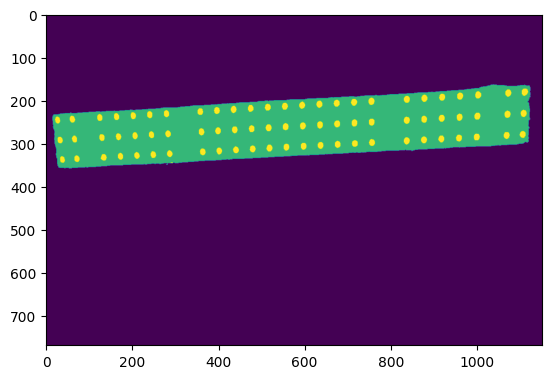

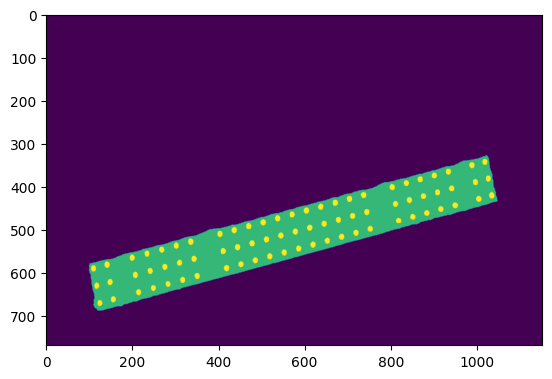

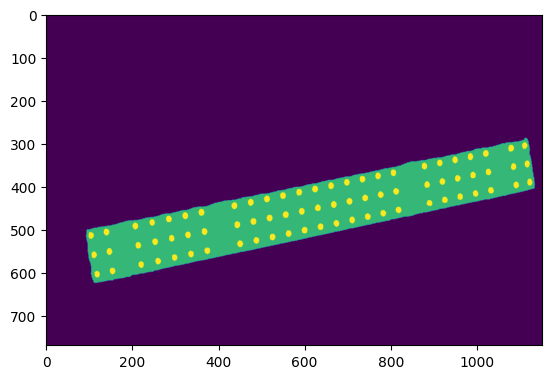

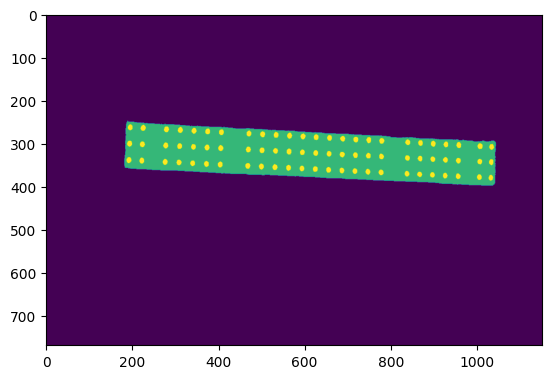

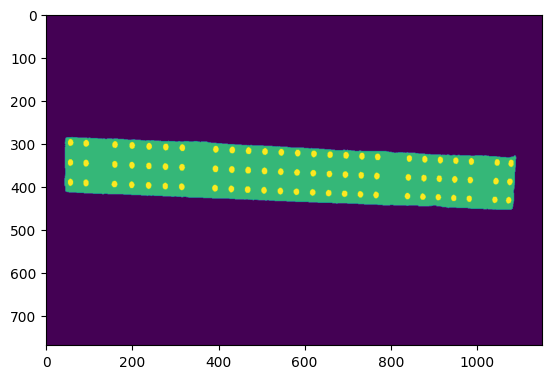

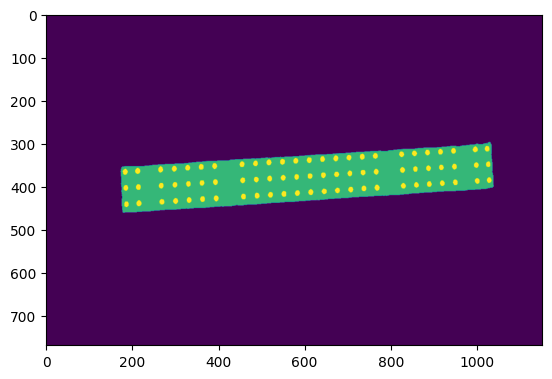

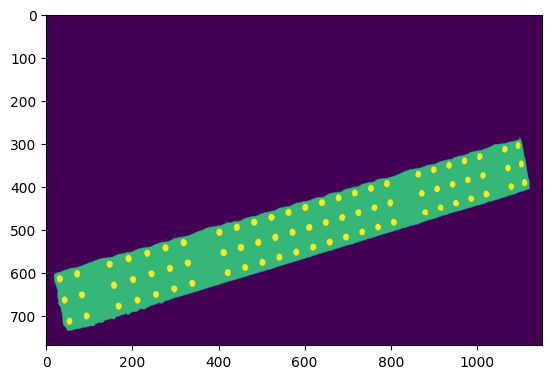

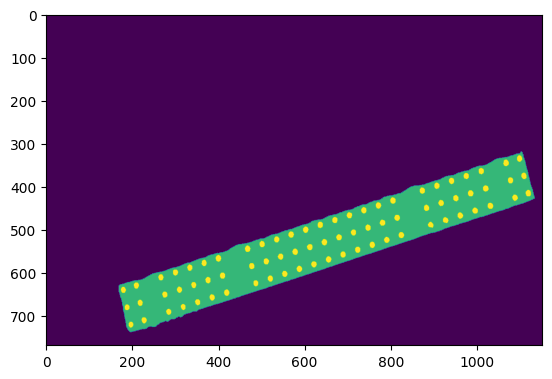

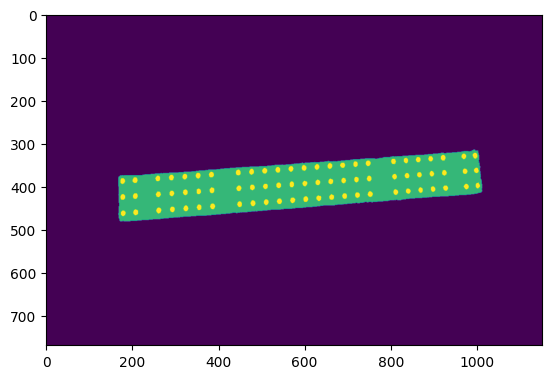

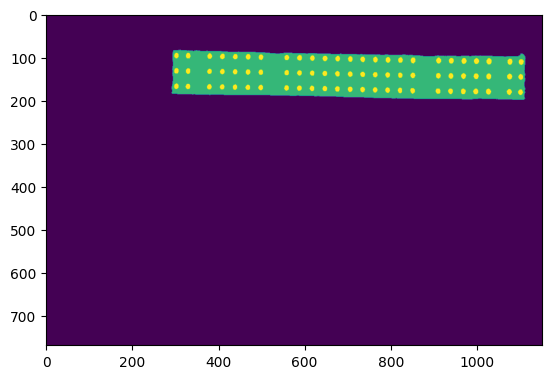

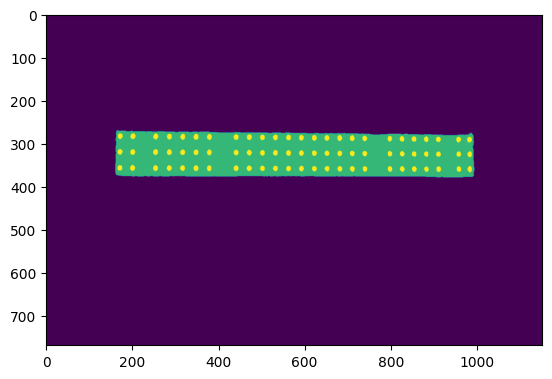

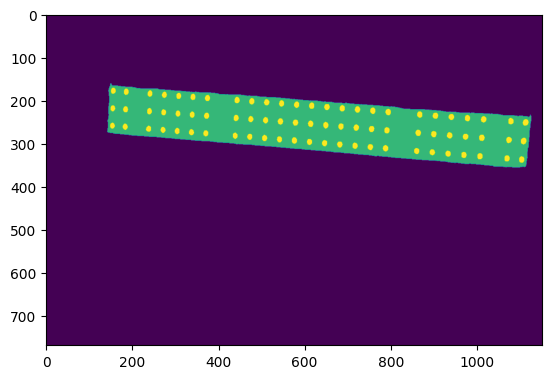

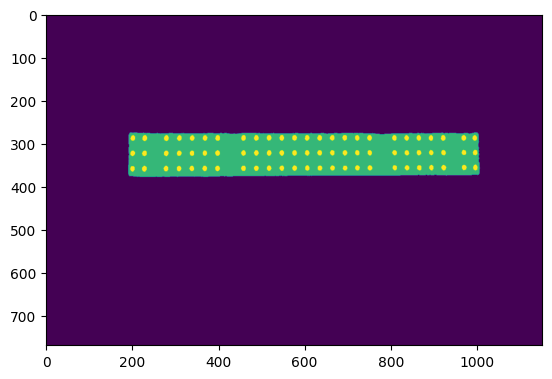

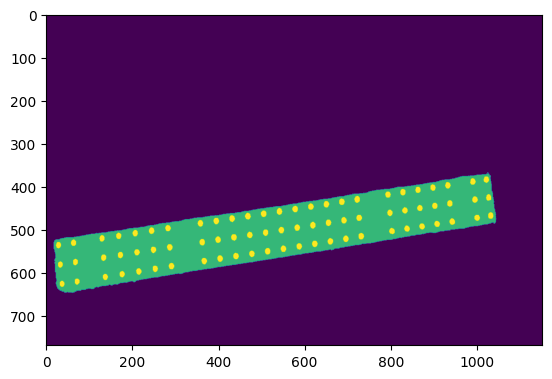

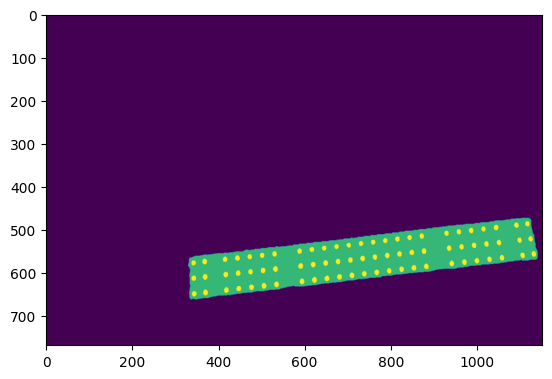

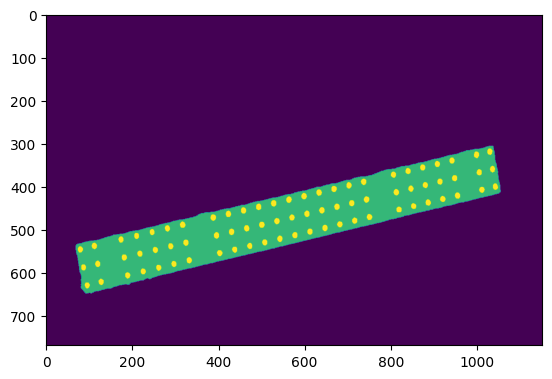

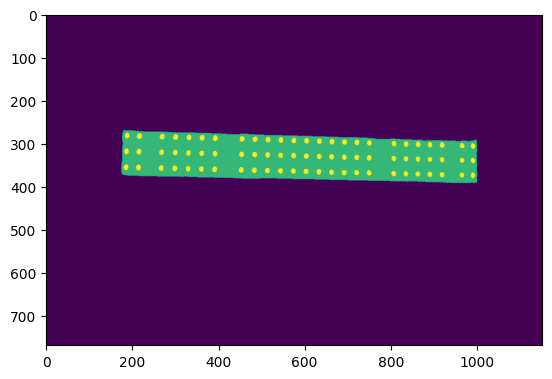

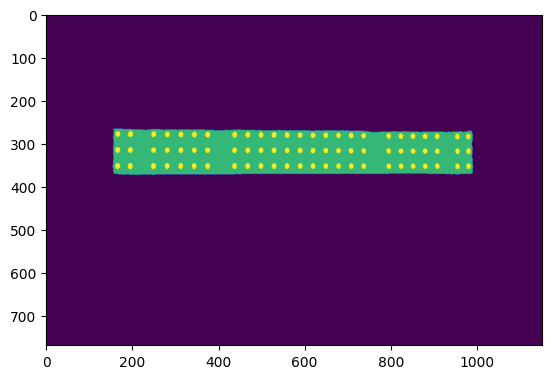

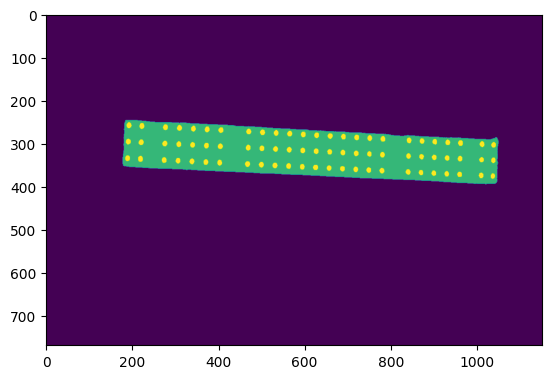

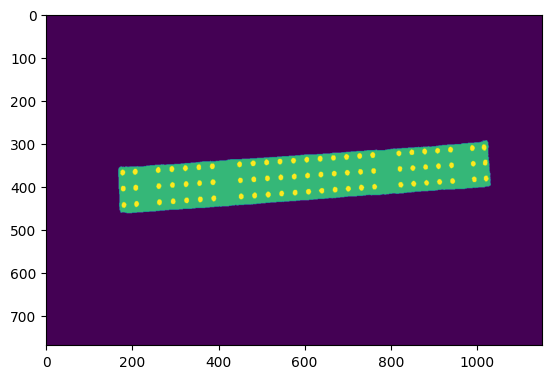

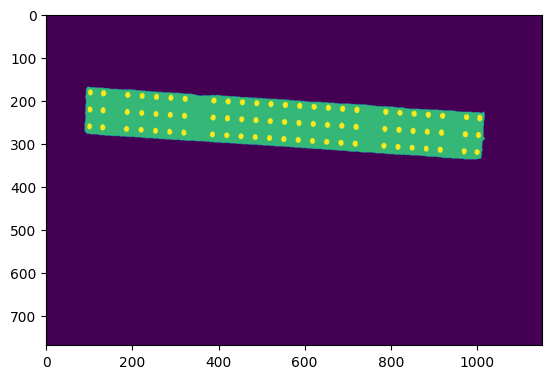

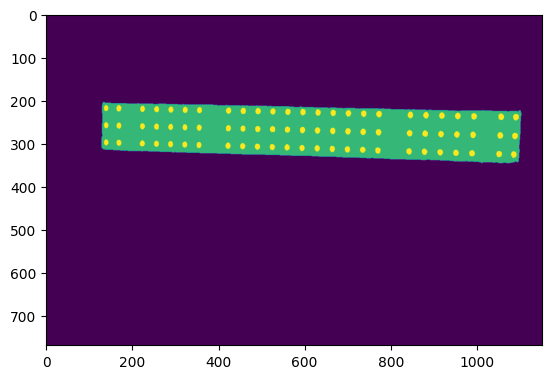

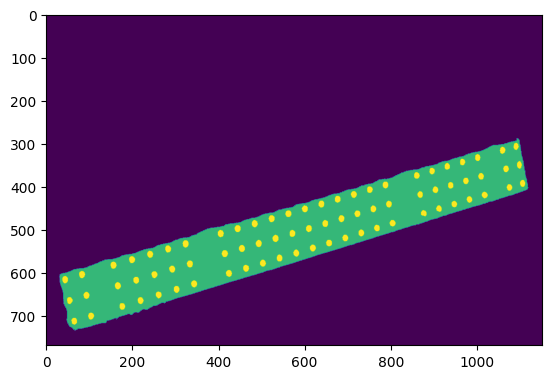

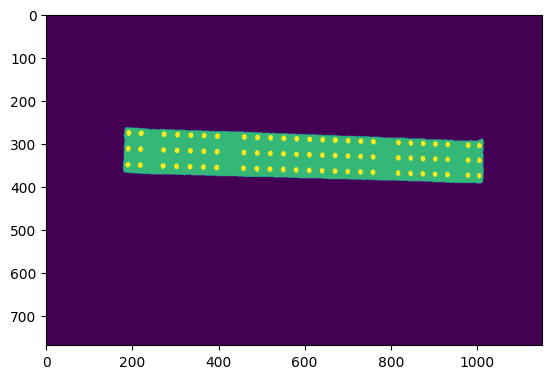

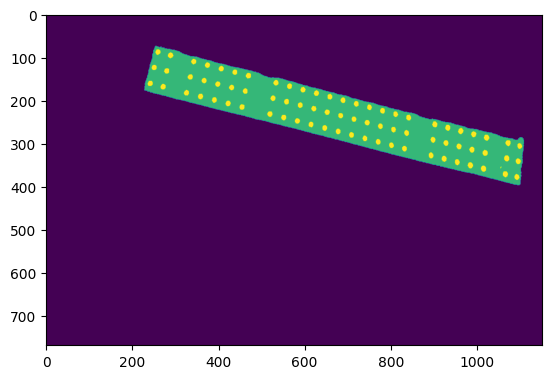

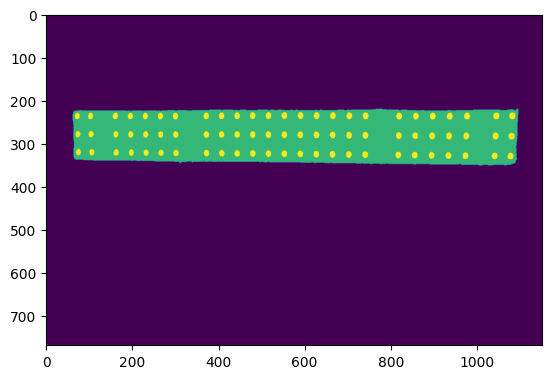

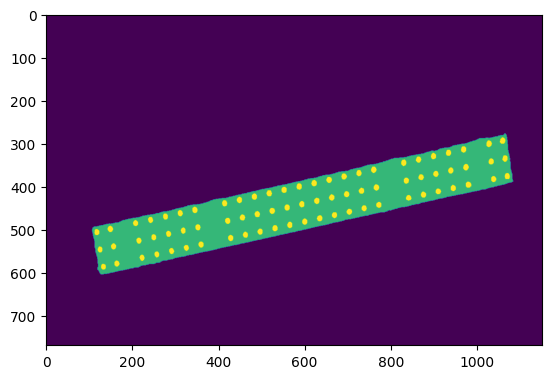

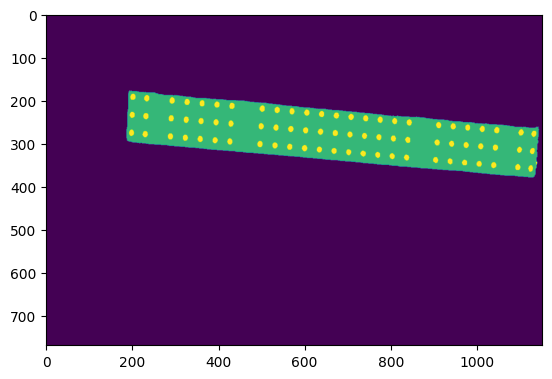

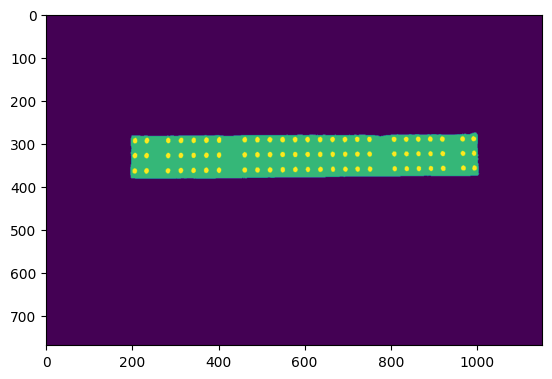

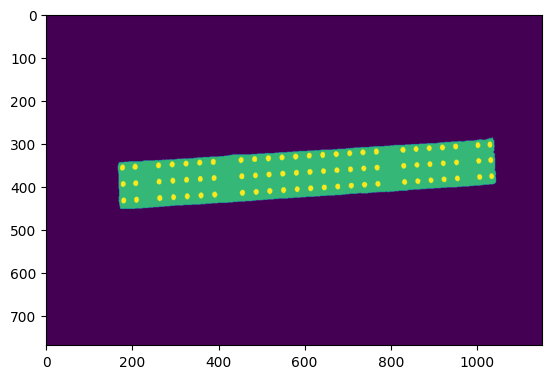

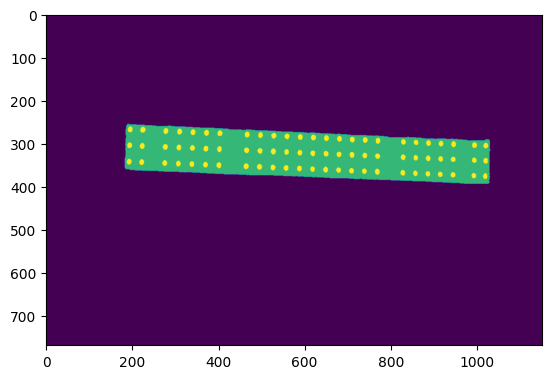

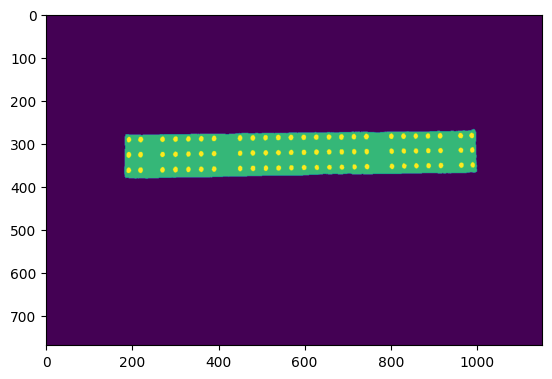

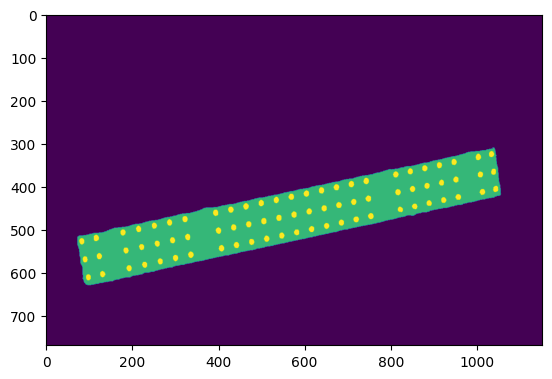

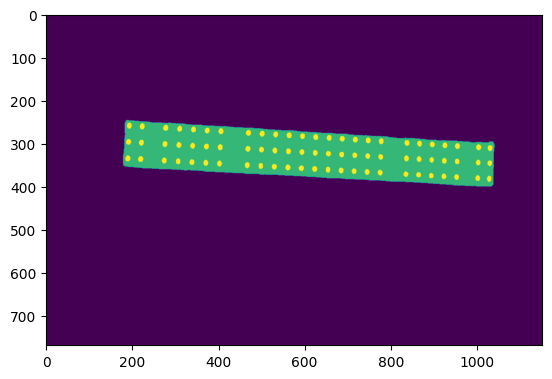

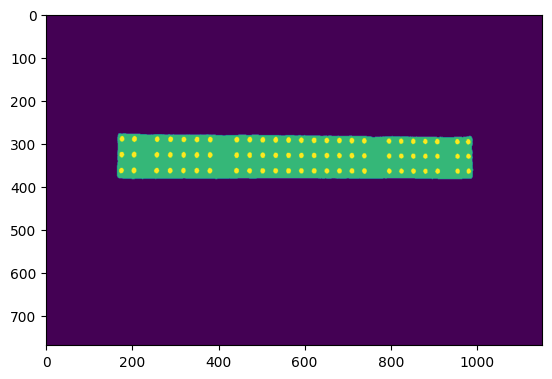

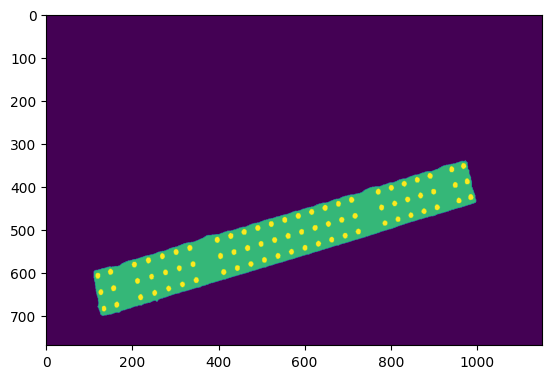

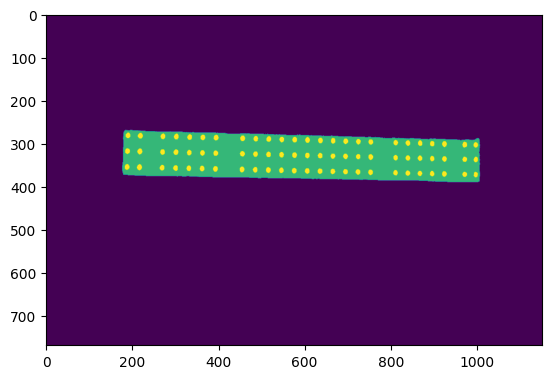

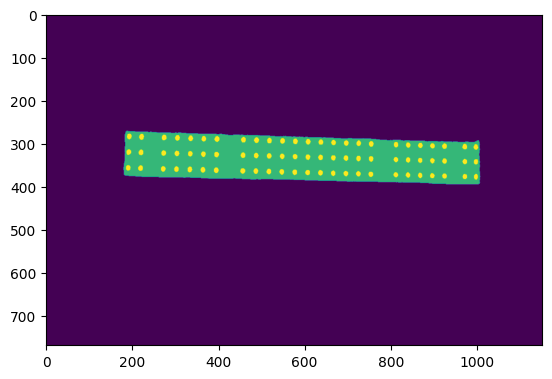

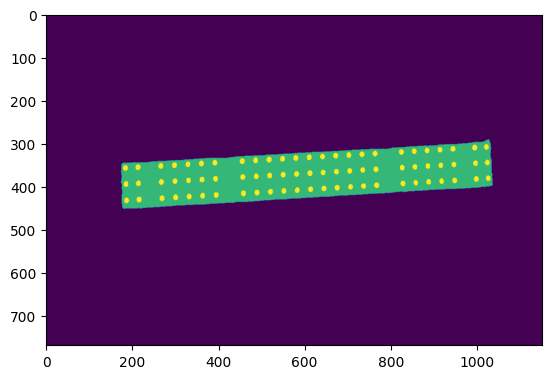

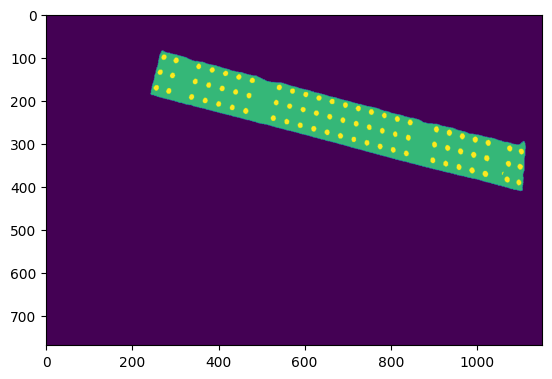

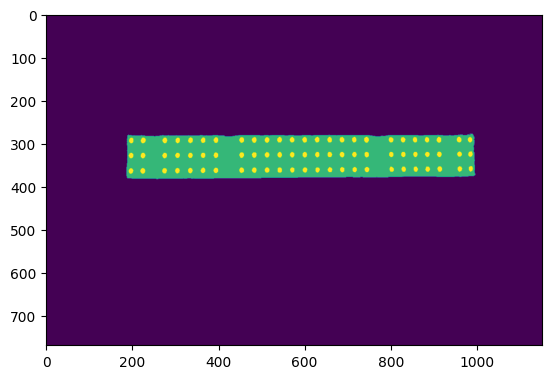

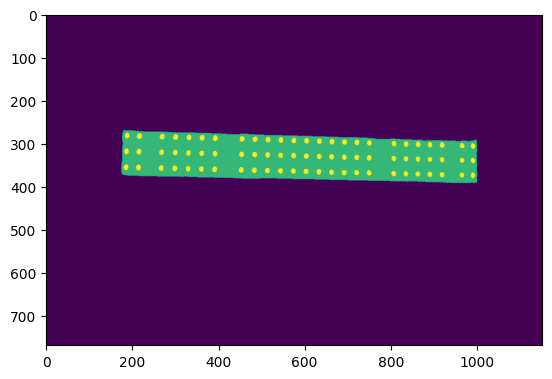

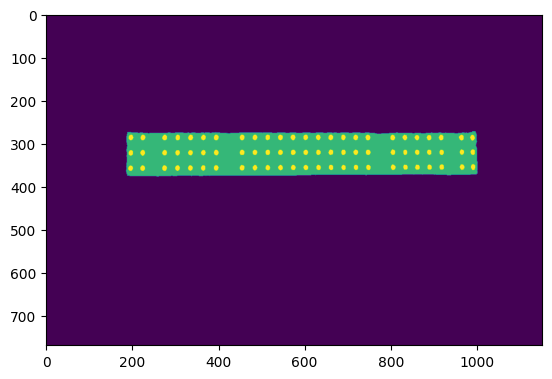

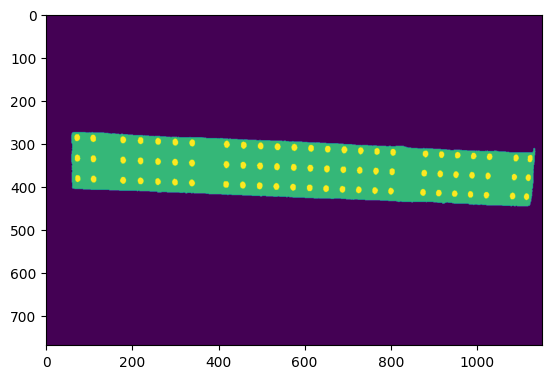

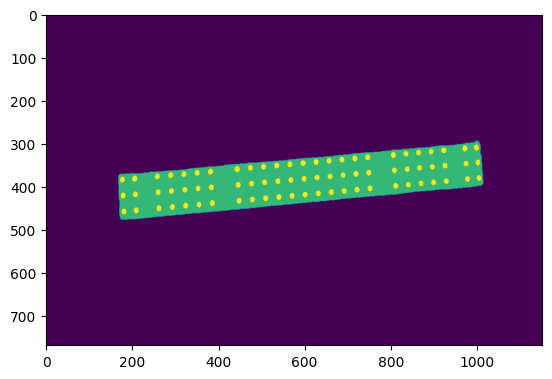

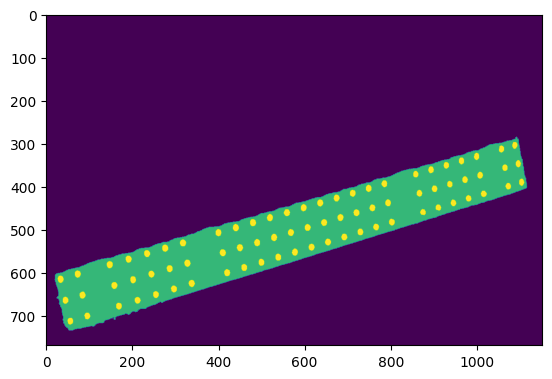

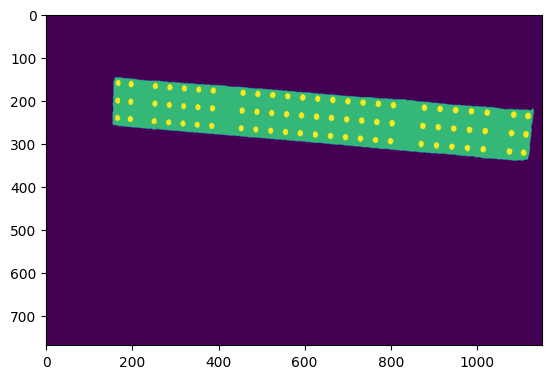

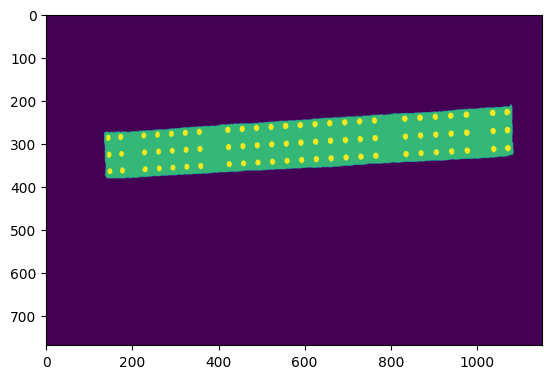

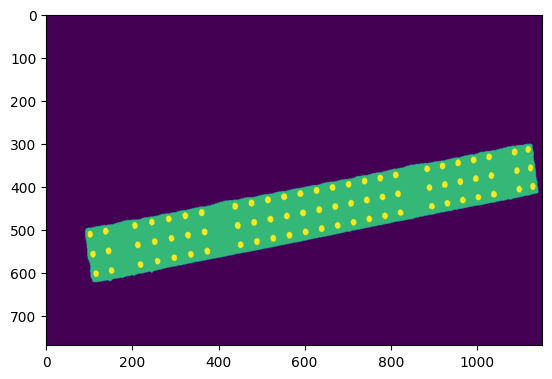

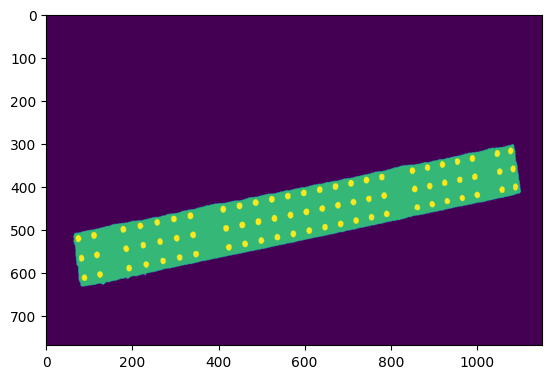

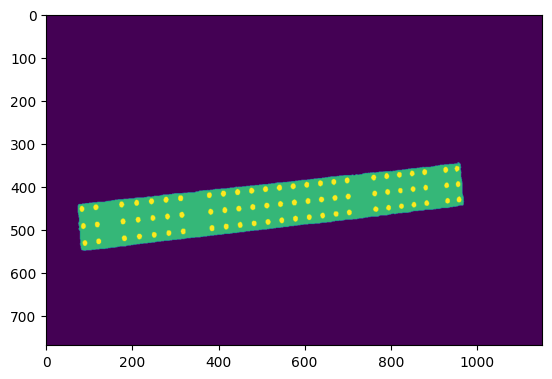

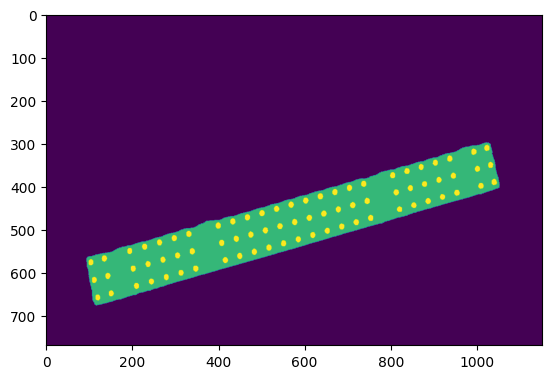

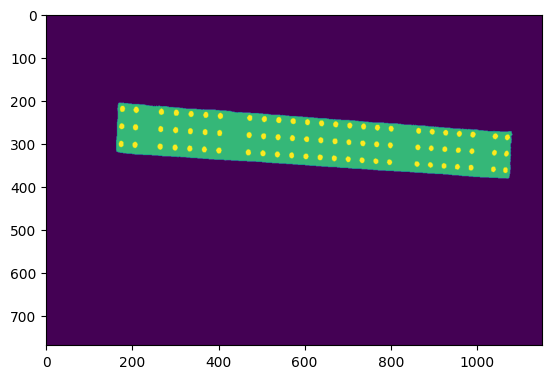

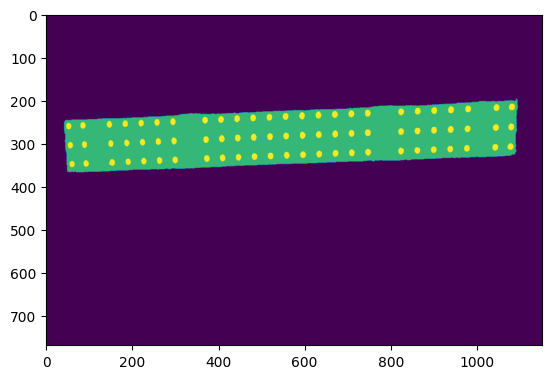

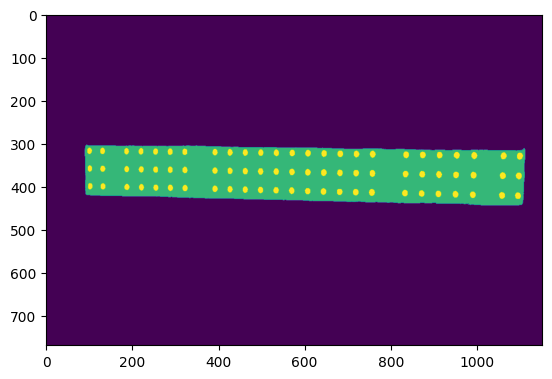

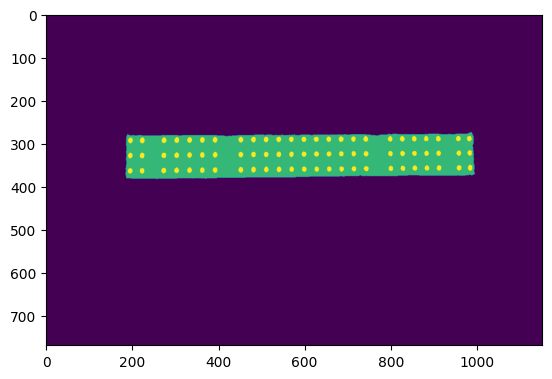

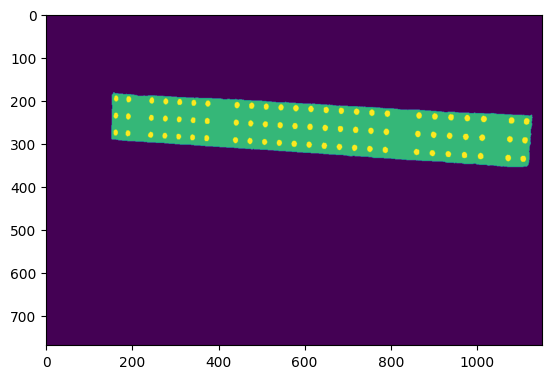

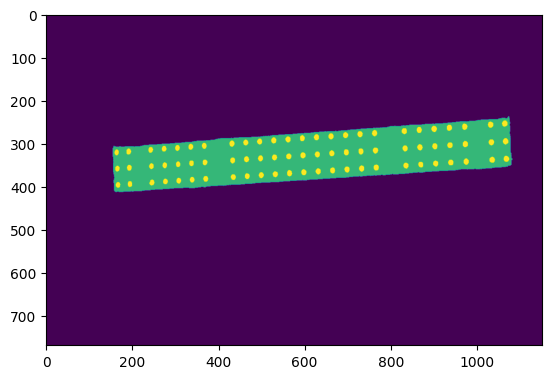

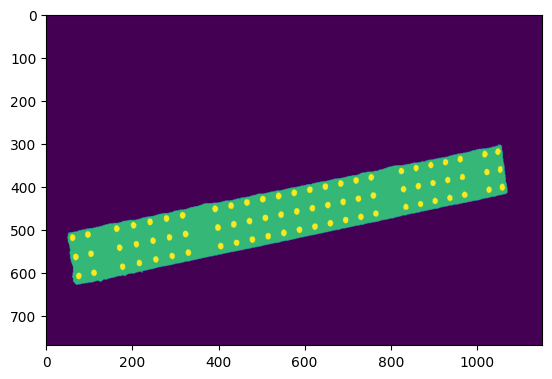

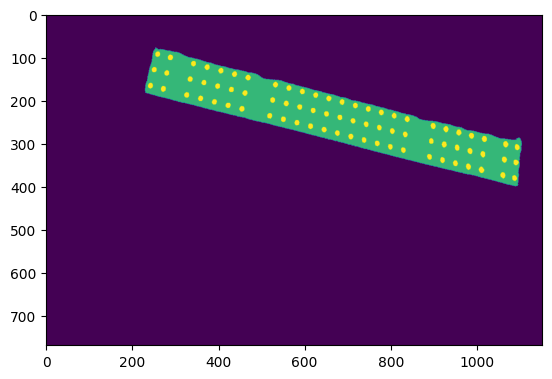

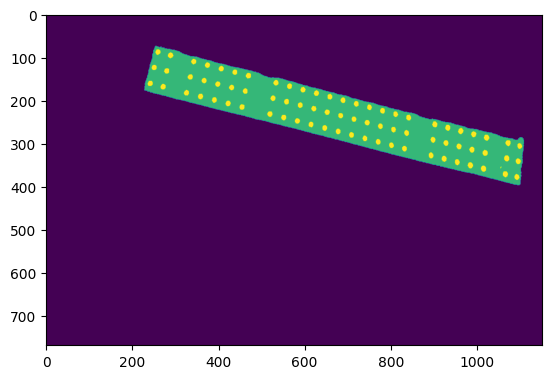

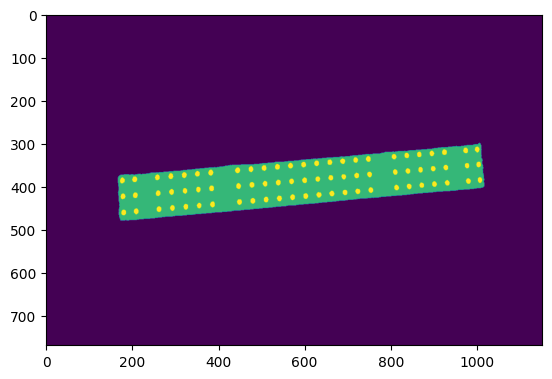

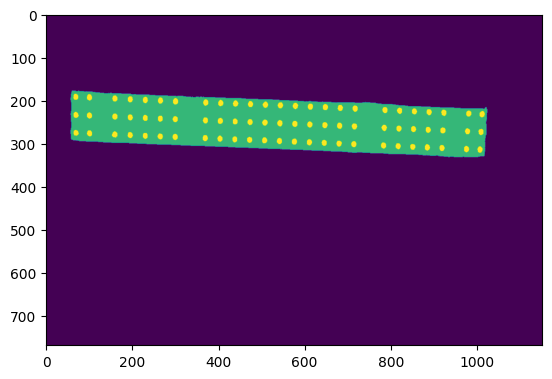

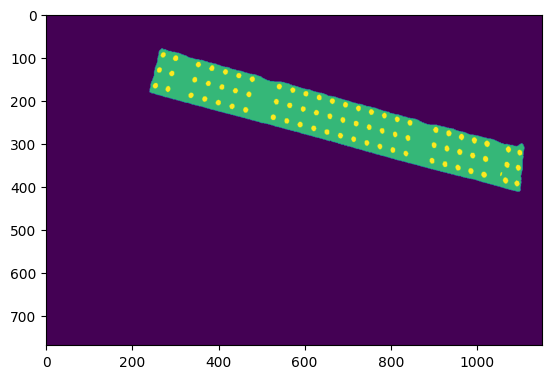

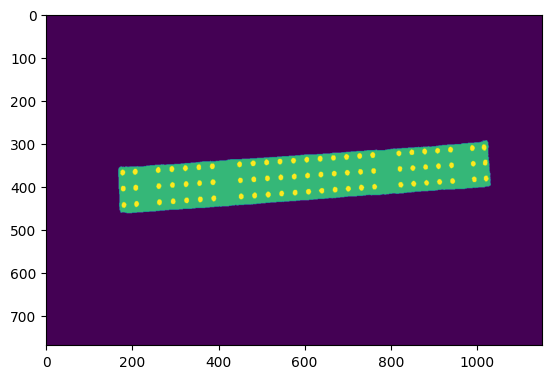

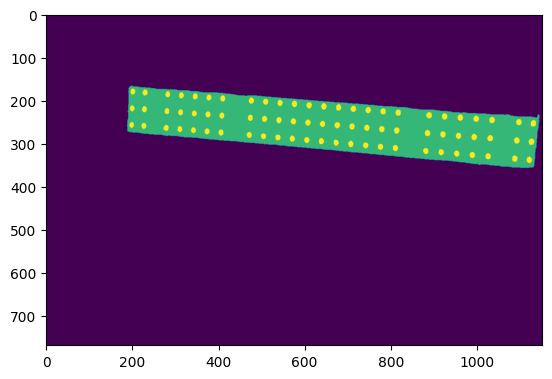

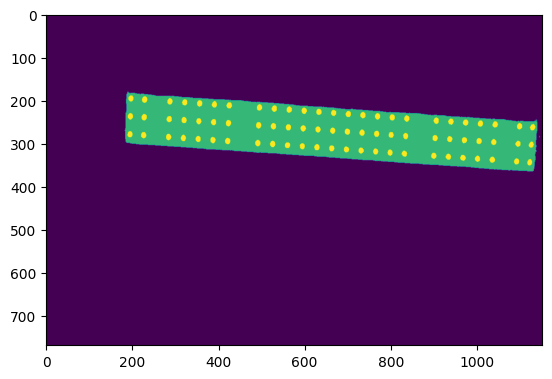

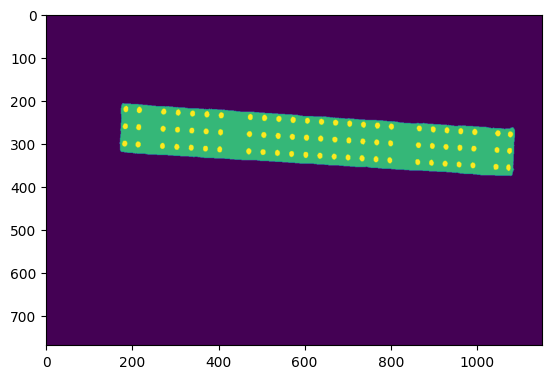

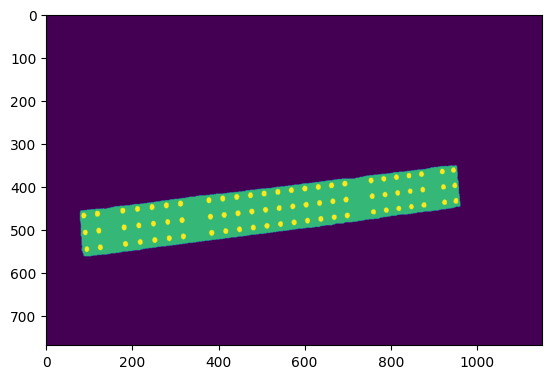

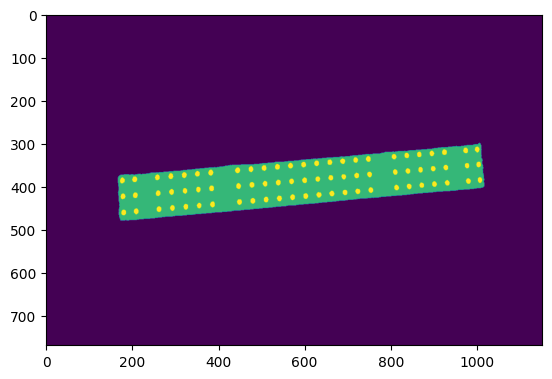

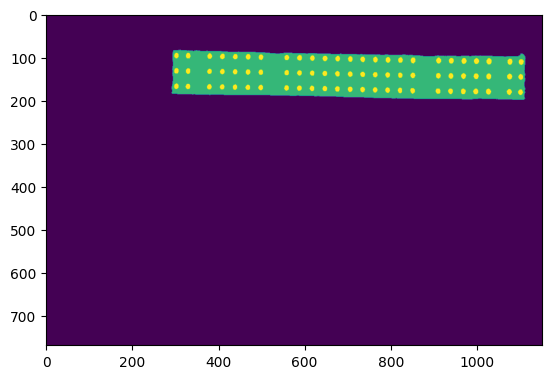

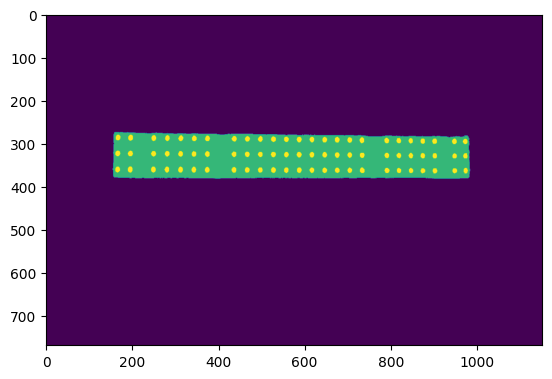

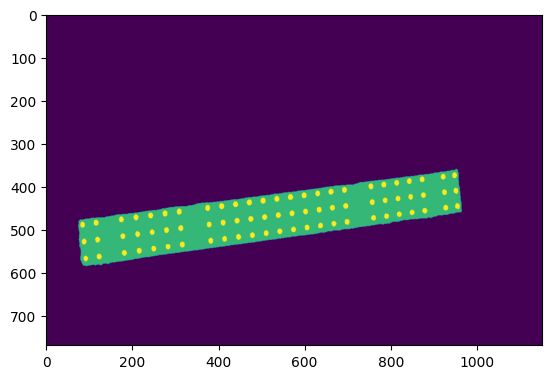

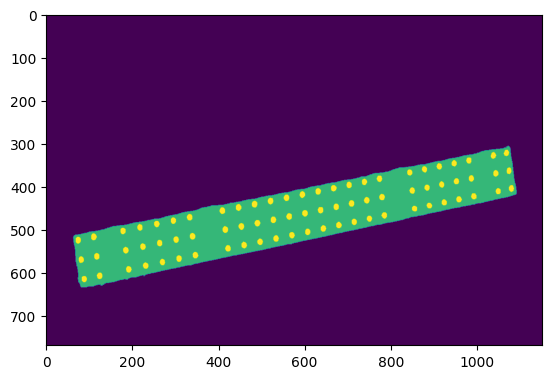

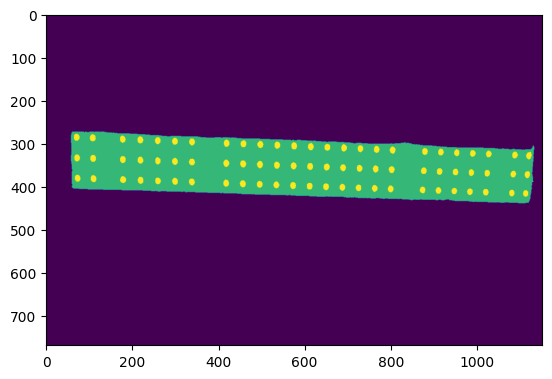

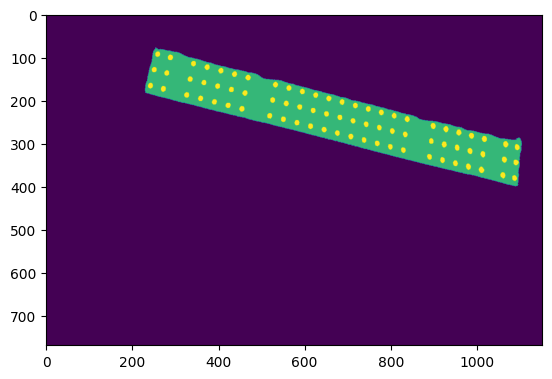

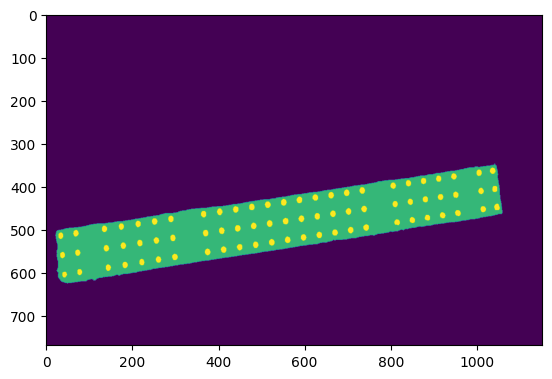

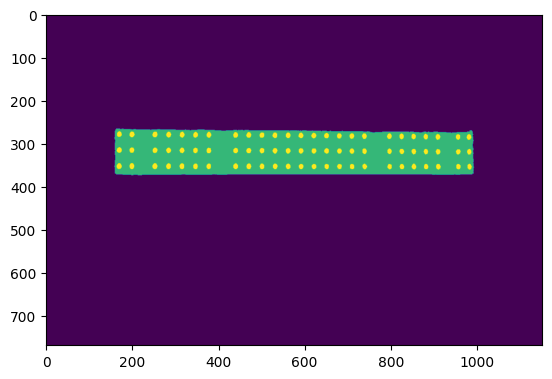

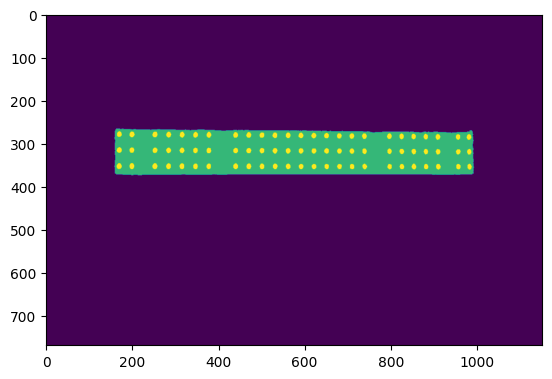

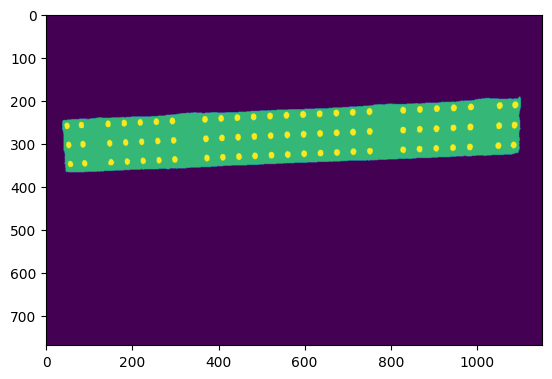

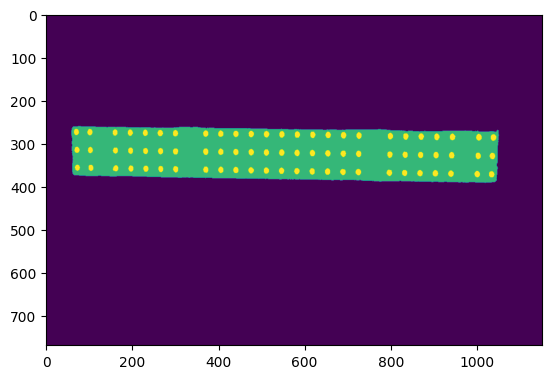

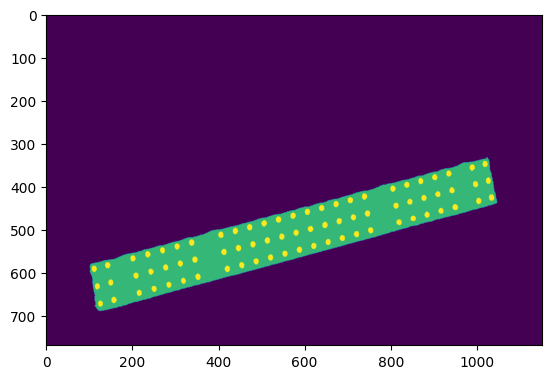

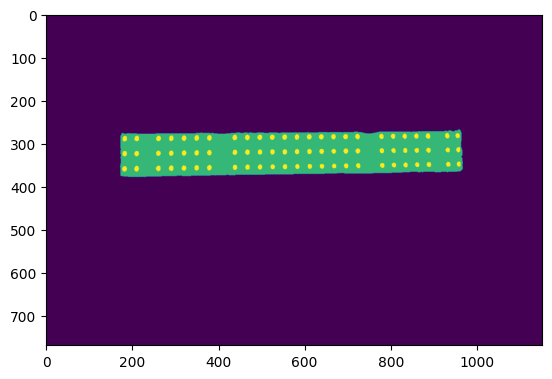

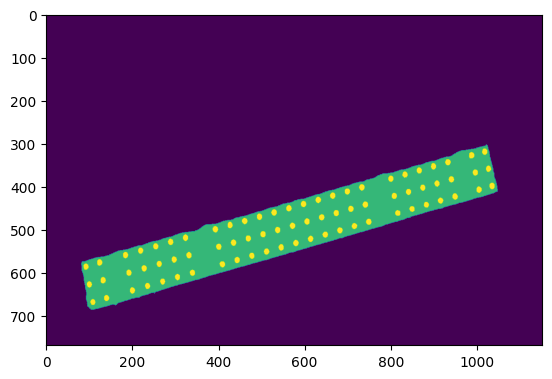

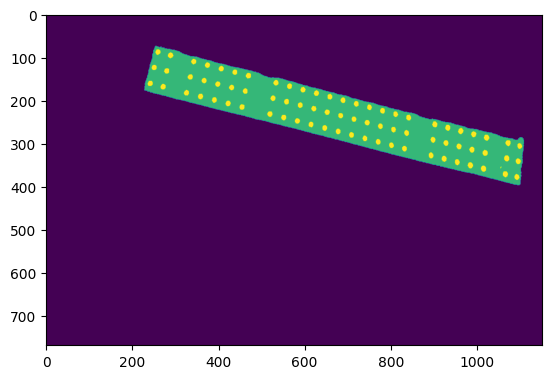

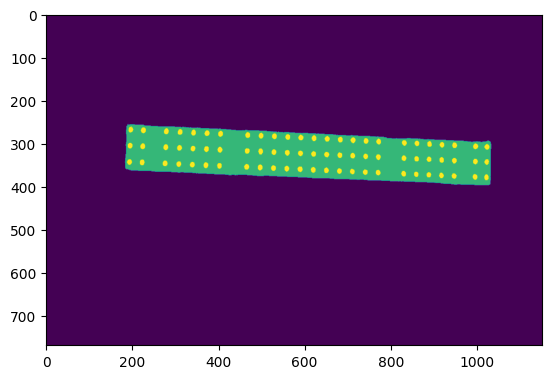

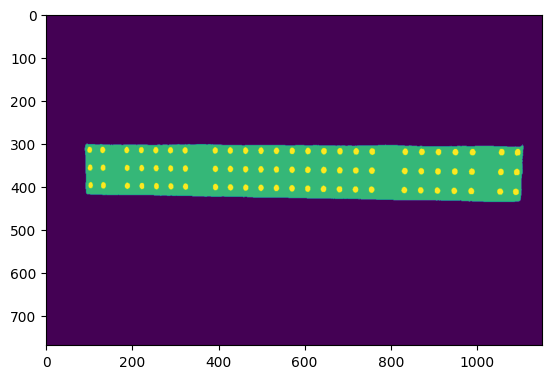

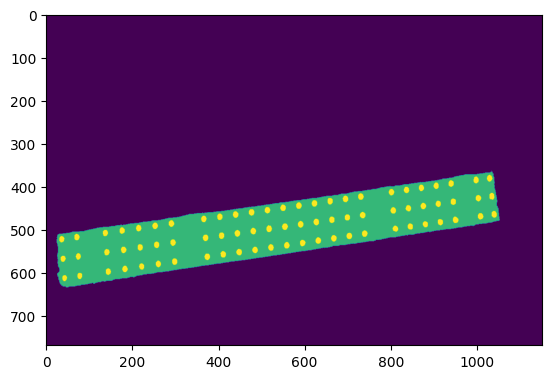

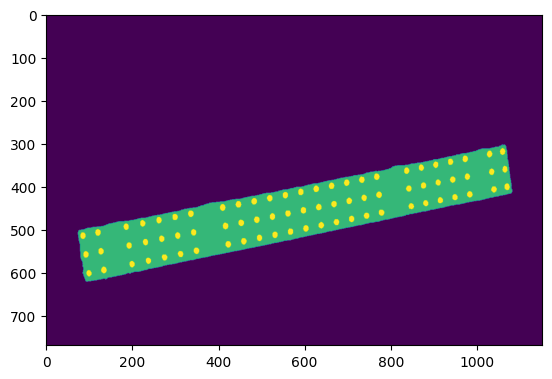

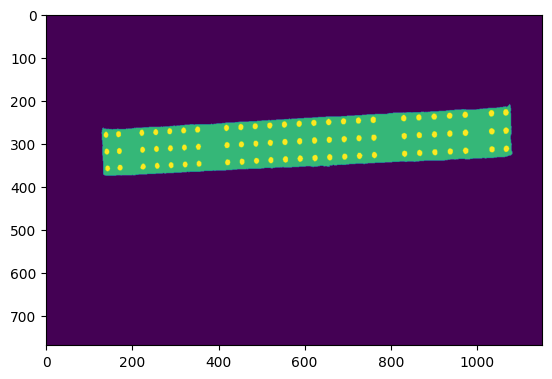

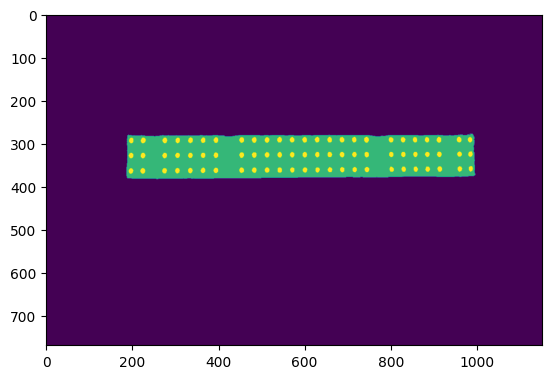

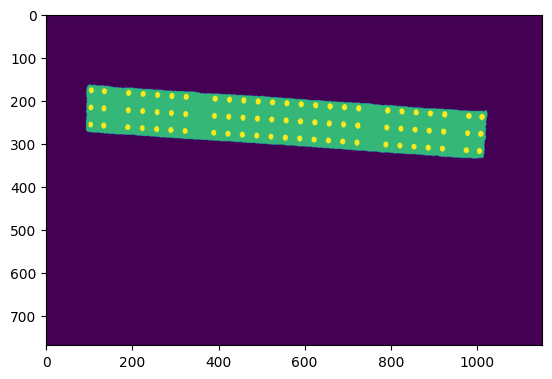

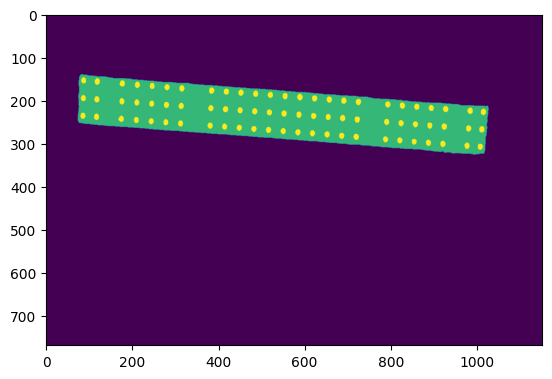

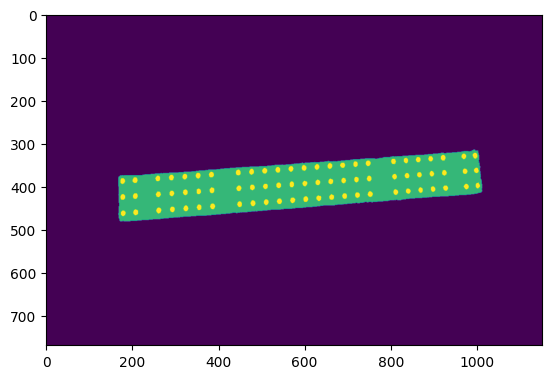

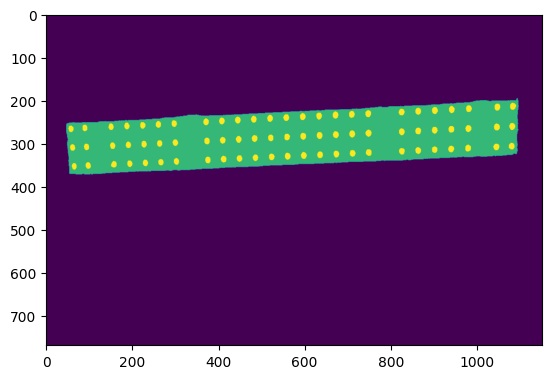

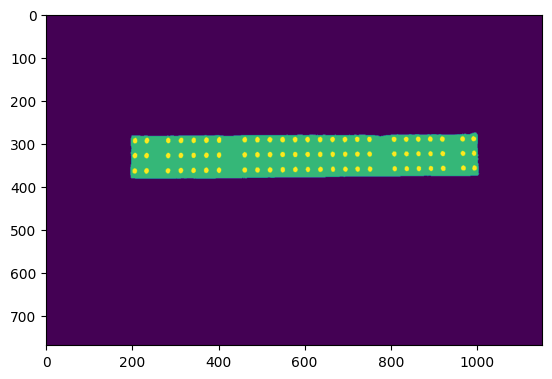

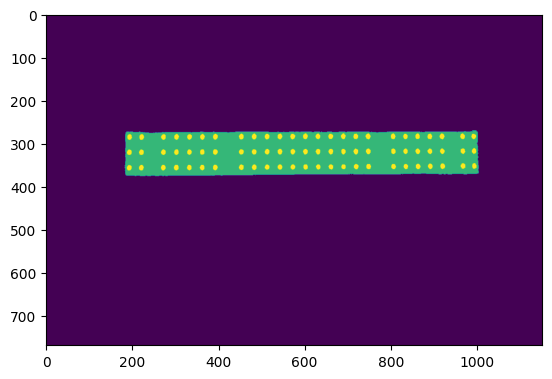

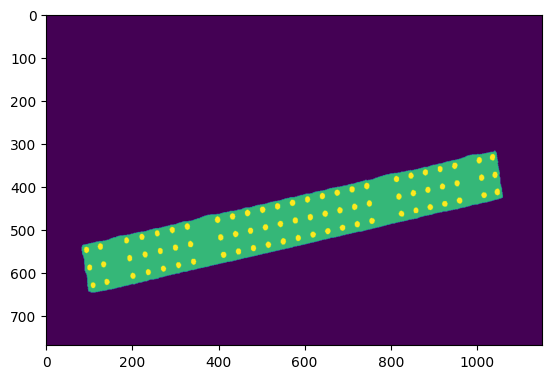

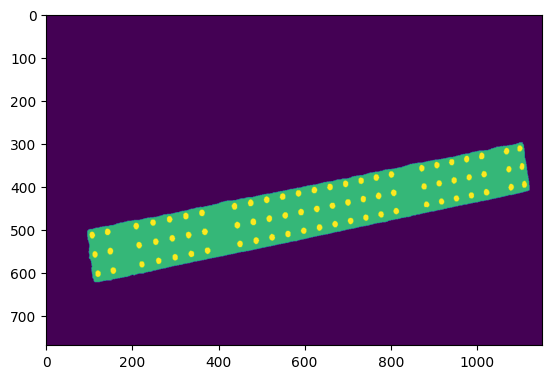

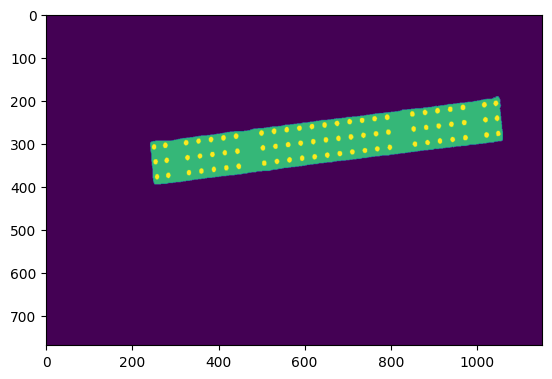

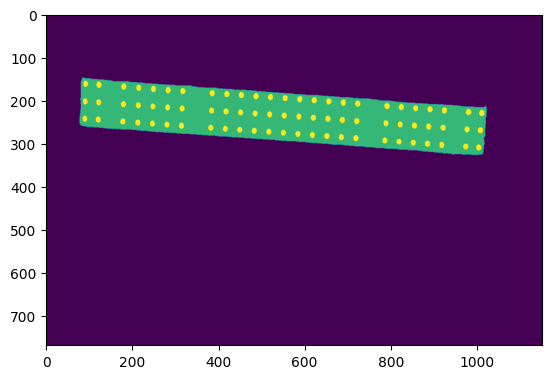

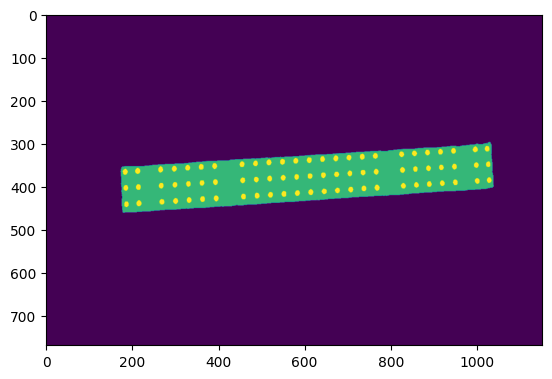

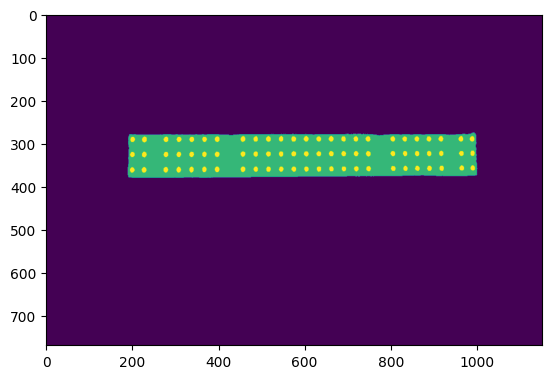

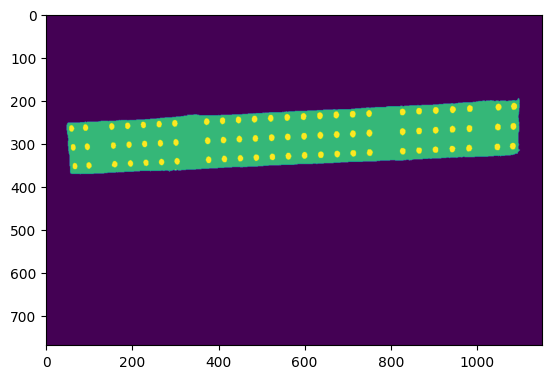

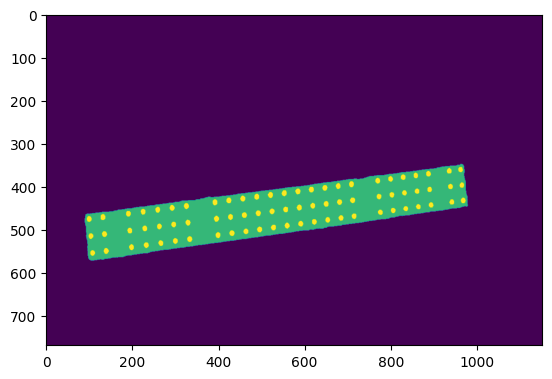

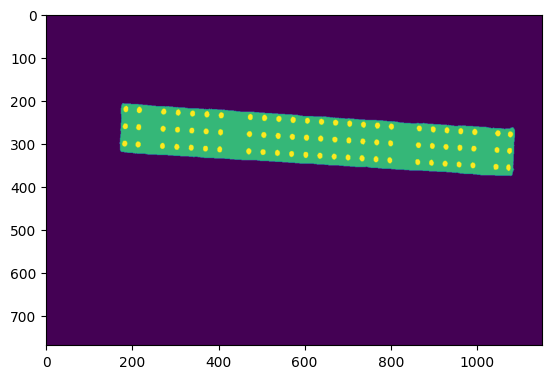

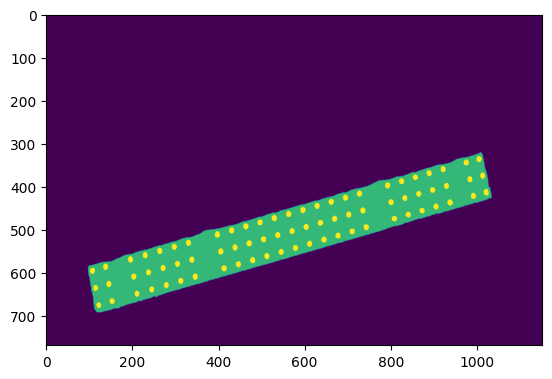

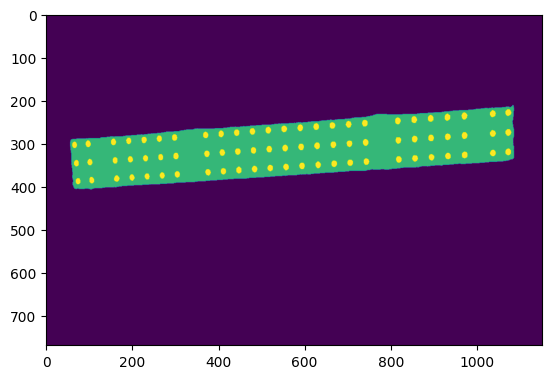

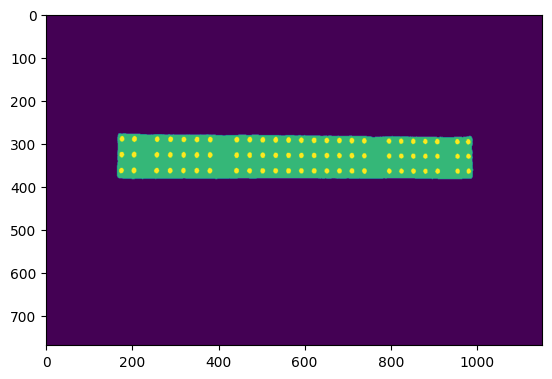

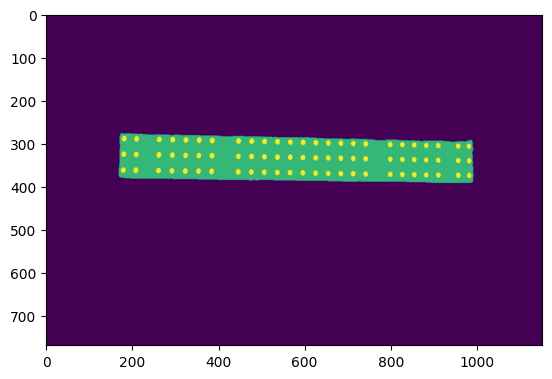

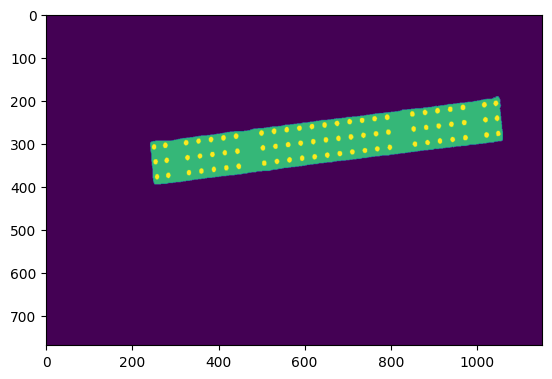

In [214]:
for img, path in zip(imgs, paths):
    img, _ = transform_image(img)

    masked = predict_image(img).numpy()
    masked = np.float32(masked)

    plt.imshow(masked)
    plt.show()

    _, thresh_1 = cv2.threshold(masked, 1, 128, cv2.THRESH_BINARY)
    _, thresh_2 = cv2.threshold(masked, 2, 255, cv2.THRESH_BINARY)

    cv2.imwrite(SAVE_PATH + "connection" + '/' + path.split('/')[-1], thresh_1)
    cv2.imwrite(SAVE_PATH + "bolt" + '/' + path.split('/')[-1], thresh_2)

In [215]:
_, bolt_img_paths = get_files(SAVE_PATH + "bolt" + "/")
_, connection_img_paths = get_files(SAVE_PATH + "connection" + "/")

In [216]:
bolt_img_paths

['/home/enfycius/Desktop/prediction/bolt/0228.png',
 '/home/enfycius/Desktop/prediction/bolt/0111.png',
 '/home/enfycius/Desktop/prediction/bolt/0124.png',
 '/home/enfycius/Desktop/prediction/bolt/0195.png',
 '/home/enfycius/Desktop/prediction/bolt/0210.png',
 '/home/enfycius/Desktop/prediction/bolt/0075.png',
 '/home/enfycius/Desktop/prediction/bolt/0082.png',
 '/home/enfycius/Desktop/prediction/bolt/0098.png',
 '/home/enfycius/Desktop/prediction/bolt/0394.png',
 '/home/enfycius/Desktop/prediction/bolt/0239.png',
 '/home/enfycius/Desktop/prediction/bolt/0408.png',
 '/home/enfycius/Desktop/prediction/bolt/0155.png',
 '/home/enfycius/Desktop/prediction/bolt/0229.png',
 '/home/enfycius/Desktop/prediction/bolt/0314.png',
 '/home/enfycius/Desktop/prediction/bolt/0179.png',
 '/home/enfycius/Desktop/prediction/bolt/0187.png',
 '/home/enfycius/Desktop/prediction/bolt/0233.png',
 '/home/enfycius/Desktop/prediction/bolt/0247.png',
 '/home/enfycius/Desktop/prediction/bolt/0169.png',
 '/home/enfy

In [217]:
connection_img_paths

['/home/enfycius/Desktop/prediction/connection/0228.png',
 '/home/enfycius/Desktop/prediction/connection/0111.png',
 '/home/enfycius/Desktop/prediction/connection/0124.png',
 '/home/enfycius/Desktop/prediction/connection/0195.png',
 '/home/enfycius/Desktop/prediction/connection/0210.png',
 '/home/enfycius/Desktop/prediction/connection/0075.png',
 '/home/enfycius/Desktop/prediction/connection/0082.png',
 '/home/enfycius/Desktop/prediction/connection/0098.png',
 '/home/enfycius/Desktop/prediction/connection/0394.png',
 '/home/enfycius/Desktop/prediction/connection/0239.png',
 '/home/enfycius/Desktop/prediction/connection/0408.png',
 '/home/enfycius/Desktop/prediction/connection/0155.png',
 '/home/enfycius/Desktop/prediction/connection/0229.png',
 '/home/enfycius/Desktop/prediction/connection/0314.png',
 '/home/enfycius/Desktop/prediction/connection/0179.png',
 '/home/enfycius/Desktop/prediction/connection/0187.png',
 '/home/enfycius/Desktop/prediction/connection/0233.png',
 '/home/enfyci

In [218]:
bolt_sample_img = cv2.imread(bolt_img_paths[40])
connection_sample_img = cv2.imread(connection_img_paths[40])

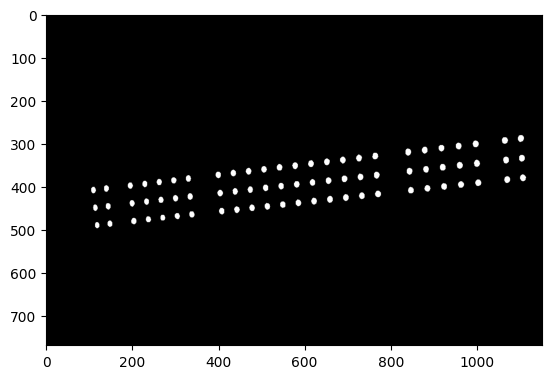

In [219]:
plt.imshow(bolt_sample_img)
plt.show()

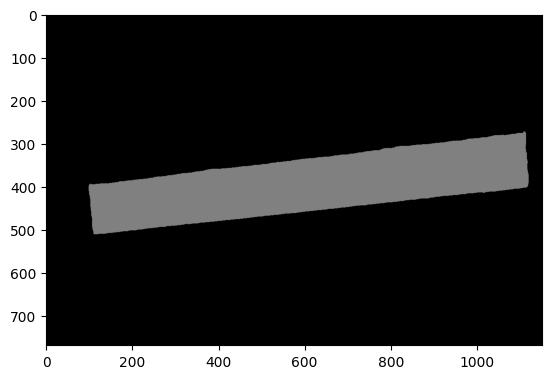

In [220]:
plt.imshow(connection_sample_img)
plt.show()

In [221]:
import sympy

In [222]:
def appx_best_fit_ngon(mask_cv2, n: int = 4) -> list[(int, int)]:
    mask_cv2_gray = cv2.cvtColor(mask_cv2, cv2.COLOR_RGB2GRAY)
    
    contours, _ = cv2.findContours(
        mask_cv2_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE
    )

    hull = cv2.convexHull(contours[0])
    hull = np.array(hull).reshape((len(hull), 2))

    hull = [sympy.Point(*pt) for pt in hull]

    while len(hull) > n:
        best_candidate = None

        for edge_idx_1 in range(len(hull)):
            edge_idx_2 = (edge_idx_1 + 1) % len(hull)

            adj_idx_1 = (edge_idx_1 - 1) % len(hull)
            adj_idx_2 = (edge_idx_1 + 2) % len(hull)

            edge_pt_1 = sympy.Point(*hull[edge_idx_1])
            edge_pt_2 = sympy.Point(*hull[edge_idx_2])
            adj_pt_1 = sympy.Point(*hull[adj_idx_1])
            adj_pt_2 = sympy.Point(*hull[adj_idx_2])

            subpoly = sympy.Polygon(adj_pt_1, edge_pt_1, edge_pt_2, adj_pt_2)
            angle1 = subpoly.angles[edge_pt_1]
            angle2 = subpoly.angles[edge_pt_2]

            if sympy.N(angle1 + angle2) <= sympy.pi:
                continue

            adj_edge_1 = sympy.Line(adj_pt_1, edge_pt_1)
            adj_edge_2 = sympy.Line(edge_pt_2, adj_pt_2)
            intersect = adj_edge_1.intersection(adj_edge_2)[0]

            area = sympy.N(sympy.Triangle(edge_pt_1, intersect, edge_pt_2).area)

            if best_candidate and best_candidate[1] < area:
                continue

            better_hull = list(hull)
            better_hull[edge_idx_1] = intersect
            del better_hull[edge_idx_2]
            best_candidate = (better_hull, area)

        if not best_candidate:
            raise ValueError("Could not find the best fit n-gon!")

        hull = best_candidate[0]

    hull = [(int(x), int(y)) for x, y in hull]

    return hull

In [223]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis = 1)

    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

In [224]:
def four_point_transform(image, pts):
	rect = order_points(pts)
	(tl, tr, br, bl) = rect

	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))

	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))

	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")

	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

	return warped

In [225]:
hull = appx_best_fit_ngon(connection_sample_img)

In [226]:
hull

[(1122, 402), (108, 512), (97, 393), (1113, 270)]

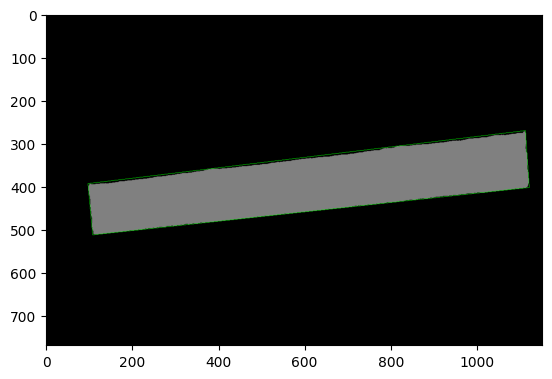

In [227]:
for idx in range(len(hull)):
    next_idx = (idx + 1) % len(hull)
    plt.imshow(cv2.line(connection_sample_img, hull[idx], hull[next_idx], (0, 255, 0), 1))

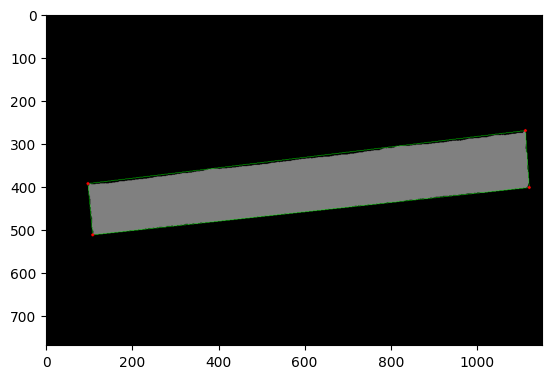

In [228]:
for pt in hull:
    plt.imshow(cv2.circle(connection_sample_img, pt, 2, (255, 0, 0), 2))

In [229]:
def transform_resize(img):
    img_transforms = A.Compose([A.Resize(768, 1152, interpolation=cv2.INTER_NEAREST)])
    aug = img_transforms(image = img)

    img = Image.fromarray(aug['image'])

    return img

In [230]:
pts = np.array(hull, dtype = "float32")

In [231]:
REF_PATH = "/home/enfycius/Desktop/filter/"

In [232]:
ref_img = cv2.imread(REF_PATH + bolt_img_paths[40].split('/')[-1], cv2.COLOR_BGR2RGB)

In [233]:
ref_img = transform_resize(ref_img)

In [234]:
ref_img = np.array(ref_img)

In [235]:
warped = four_point_transform(ref_img, pts)

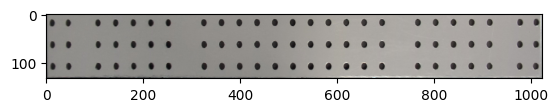

In [236]:
plt.imshow(warped)

In [237]:
warped.shape

(132, 1023, 3)

In [238]:
img = cv2.imread(REF_PATH + bolt_img_paths[45].split('/')[-1], cv2.COLOR_BGR2RGB)
connection_label = cv2.imread(connection_img_paths[45])
bolt_label = cv2.imread(bolt_img_paths[45])

In [239]:
def processing(img, connection_label, bolt_label):
    hull = appx_best_fit_ngon(connection_label)
    pts = np.array(hull, dtype = "float32")
    
    ref_img = img
    ref_img = transform_resize(ref_img)
    ref_img = np.array(ref_img)

    ref_bolt_label = bolt_label
    ref_bolt_label = transform_resize(ref_bolt_label)
    ref_bolt_label = np.array(ref_bolt_label)

    f, axs = plt.subplots(1, 4, figsize=(25, 25))

    axs[0].imshow(img)

    for idx in range(len(hull)):
        next_idx = (idx + 1) % len(hull)
        axs[1].imshow(cv2.line(connection_label, hull[idx], hull[next_idx], (0, 255, 0), 10))

    for pt in hull:
        axs[1].imshow(cv2.circle(connection_label, pt, 2, (255, 0, 0), 10))
    
    warped = four_point_transform(ref_img, pts)
    warped_bolt = four_point_transform(ref_bolt_label, pts)

    axs[2].imshow(warped)
    axs[3].imshow(warped_bolt)
    
    print(warped.shape) 

    return [warped, warped_bolt]

(135, 1056, 3)


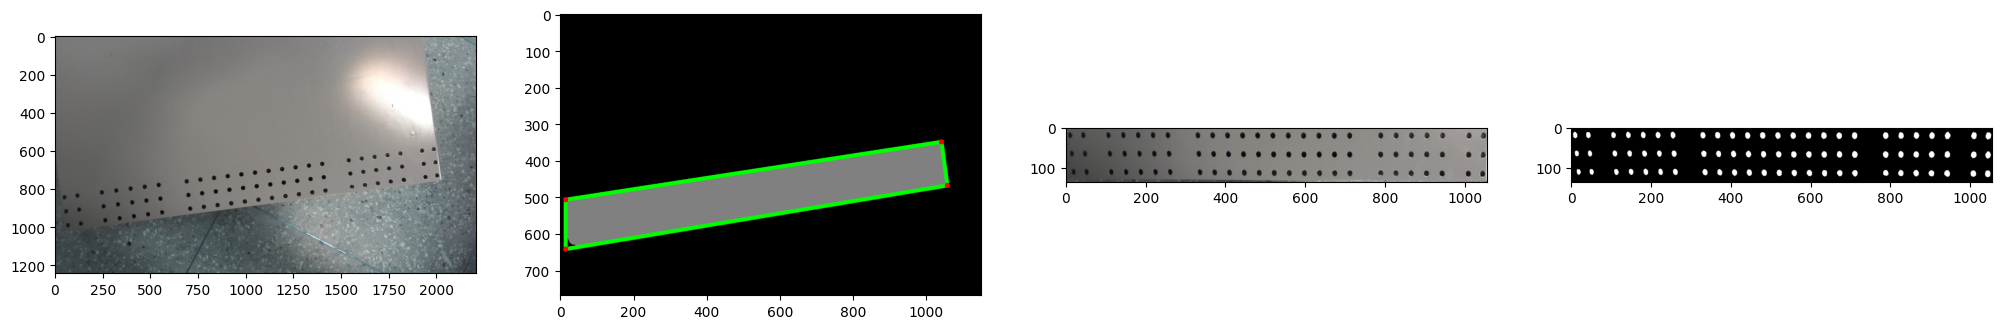

In [240]:
warped, warped_bolt = processing(img, connection_label, bolt_label)

In [266]:
dst = cv2.resize(warped_bolt, (1100, 140))

In [267]:
dst.shape

(140, 1100, 3)

In [268]:
dst = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)

In [269]:
contours,hierarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [270]:
for cnt in contours:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(dst, center, radius, (255, 0, 0), 2)

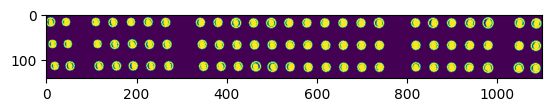

In [271]:
plt.imshow(dst)
plt.show()